<a href="https://colab.research.google.com/github/AtulAravindDas/MYMLDLDAPROJECTS/blob/main/DavidWarnerAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING THE DATASET AND CONVERSION TO DATAFRAME**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import io
from google.colab import files
uploaded=files.upload()
DWdata=pd.read_excel(io.BytesIO(uploaded['David Warner Career Summary.xlsx']))

Saving David Warner Career Summary.xlsx to David Warner Career Summary.xlsx


In [ ]:
DWdata.head()

,Runs\n,Mins\n,BF\n,4s\n,6s\n,SR\n,Pos\n,Dismissal,Innings\n,Opposition\n,Ground,Match Date\n,Notouts
0,89,64,43,7,6,206.97,2.0,Caught,1,v South Africa,Melbourne,2009-01-11 00:00:00,0
1,7,16,12,0,0,58.33,2.0,bowled,2,v South Africa,Brisbane,2009-01-13 00:00:00,0
2,23,19,15,4,0,153.33,1.0,Caught,1,v New Zealand,Sydney,2009-02-15 00:00:00,0
3,38,37,29,4,1,131.03,1.0,Caught,1,v South Africa,Johannesburg,2009-03-27 00:00:00,0
4,20,21,15,2,1,133.33,2.0,bowled,2,v South Africa,Centurion,2009-03-29 00:00:00,0


# **DATA CLEANING**

This is used to remove unnecessary information and fine tune the dataset even more to improve readability

In [ ]:
print(DWdata.columns.tolist())

['Runs\n', 'Mins\n', 'BF\n', '4s\n', '6s\n', 'SR\n', 'Pos\n', 'Dismissal', 'Innings\n', 'Opposition\n', 'Ground', 'Match Date\n', 'Notouts']


In [ ]:
DWdata.rename(columns={'Runs\n':'Runs','Mins\n':'Mins','BF\n':'BF','Innings\n':'Innings','4s\n':'fours','6s\n':'sixes','SR\n':'SR','Pos\n':'Pos','Opposition\n':'Opposition','Match Date\n':'Match Date'},inplace=True)
DWdata2=DWdata[['Runs','Mins','BF','fours','sixes','SR','Pos','Innings','Opposition','Ground','Match Date','Notouts']]

In [ ]:
DWdata3=DWdata2

In [ ]:
DWdata=DWdata.drop('Innings',axis='columns')#Drop the Column Innings

In [ ]:
print(DWdata.head()) #Prints the attributes with values but not in tabulated form

   Runs Mins  BF  fours  sixes      SR  Pos Dismissal      Opposition  \
0    89   64  43      7      6  206.97  2.0    Caught  v South Africa   
1     7   16  12      0      0   58.33  2.0    bowled  v South Africa   
2    23   19  15      4      0  153.33  1.0    Caught   v New Zealand   
3    38   37  29      4      1  131.03  1.0    Caught  v South Africa   
4    20   21  15      2      1  133.33  2.0    bowled  v South Africa   

         Ground           Match Date  Notouts  
0     Melbourne  2009-01-11 00:00:00        0  
1      Brisbane  2009-01-13 00:00:00        0  
2        Sydney  2009-02-15 00:00:00        0  
3  Johannesburg  2009-03-27 00:00:00        0  
4     Centurion  2009-03-29 00:00:00        0  


In [ ]:
DWdata=DWdata.drop('Pos',axis='columns')

In [ ]:
DWdata #Tabulated form

,Runs,Mins,BF,fours,sixes,SR,Dismissal,Opposition,Ground,Match Date,Notouts
0,89,64,43,7,6,206.97,Caught,v South Africa,Melbourne,2009-01-11 00:00:00,0
1,7,16,12,0,0,58.33,bowled,v South Africa,Brisbane,2009-01-13 00:00:00,0
2,23,19,15,4,0,153.33,Caught,v New Zealand,Sydney,2009-02-15 00:00:00,0
3,38,37,29,4,1,131.03,Caught,v South Africa,Johannesburg,2009-03-27 00:00:00,0
4,20,21,15,2,1,133.33,bowled,v South Africa,Centurion,2009-03-29 00:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...
94,4,22,11,0,0,36.36,Caught,v England,Canberra,2022-10-12 00:00:00,0
95,5,7,6,1,0,83.33,bowled,v New Zealand,Sydney,2022-10-22 00:00:00,0
96,11,26,10,0,0,110.00,Caught,v Sri Lanka,Perth,2022-10-25 00:00:00,0
97,3,13,7,0,0,42.85,Caught,v Ireland,Brisbane,2022-10-31 00:00:00,0


In [ ]:
DWdata['Opposition']=DWdata['Opposition'].apply(lambda x:x[2:]) #Removes the 'v ' in Opposition and the apply function applies it to all values of the particular attribute(column)

In [ ]:
DWdata

,Runs,Mins,BF,fours,sixes,SR,Dismissal,Opposition,Ground,Match Date,Notouts
0,89,64,43,7,6,206.97,Caught,South Africa,Melbourne,2009-01-11 00:00:00,0
1,7,16,12,0,0,58.33,bowled,South Africa,Brisbane,2009-01-13 00:00:00,0
2,23,19,15,4,0,153.33,Caught,New Zealand,Sydney,2009-02-15 00:00:00,0
3,38,37,29,4,1,131.03,Caught,South Africa,Johannesburg,2009-03-27 00:00:00,0
4,20,21,15,2,1,133.33,bowled,South Africa,Centurion,2009-03-29 00:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...
94,4,22,11,0,0,36.36,Caught,England,Canberra,2022-10-12 00:00:00,0
95,5,7,6,1,0,83.33,bowled,New Zealand,Sydney,2022-10-22 00:00:00,0
96,11,26,10,0,0,110.00,Caught,Sri Lanka,Perth,2022-10-25 00:00:00,0
97,3,13,7,0,0,42.85,Caught,Ireland,Brisbane,2022-10-31 00:00:00,0


In [ ]:
DWdata['Match Date']=pd.to_datetime(DWdata['Match Date']) #Converting  string  series to Datetime format

In [ ]:
DWdata

,Runs,Mins,BF,fours,sixes,SR,Dismissal,Opposition,Ground,Match Date,Notouts
0,89,64,43,7,6,206.97,Caught,South Africa,Melbourne,2009-01-11,0
1,7,16,12,0,0,58.33,bowled,South Africa,Brisbane,2009-01-13,0
2,23,19,15,4,0,153.33,Caught,New Zealand,Sydney,2009-02-15,0
3,38,37,29,4,1,131.03,Caught,South Africa,Johannesburg,2009-03-27,0
4,20,21,15,2,1,133.33,bowled,South Africa,Centurion,2009-03-29,0
...,...,...,...,...,...,...,...,...,...,...,...
94,4,22,11,0,0,36.36,Caught,England,Canberra,2022-10-12,0
95,5,7,6,1,0,83.33,bowled,New Zealand,Sydney,2022-10-22,0
96,11,26,10,0,0,110.00,Caught,Sri Lanka,Perth,2022-10-25,0
97,3,13,7,0,0,42.85,Caught,Ireland,Brisbane,2022-10-31,0


In [ ]:
DWdata['year']=DWdata['Match Date'].dt.year.astype(int)

In [ ]:
DWdata

,Runs,Mins,BF,fours,sixes,SR,Dismissal,Opposition,Ground,Match Date,Notouts,year
0,89,64,43,7,6,206.97,Caught,South Africa,Melbourne,2009-01-11,0,2009
1,7,16,12,0,0,58.33,bowled,South Africa,Brisbane,2009-01-13,0,2009
2,23,19,15,4,0,153.33,Caught,New Zealand,Sydney,2009-02-15,0,2009
3,38,37,29,4,1,131.03,Caught,South Africa,Johannesburg,2009-03-27,0,2009
4,20,21,15,2,1,133.33,bowled,South Africa,Centurion,2009-03-29,0,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
94,4,22,11,0,0,36.36,Caught,England,Canberra,2022-10-12,0,2022
95,5,7,6,1,0,83.33,bowled,New Zealand,Sydney,2022-10-22,0,2022
96,11,26,10,0,0,110.00,Caught,Sri Lanka,Perth,2022-10-25,0,2022
97,3,13,7,0,0,42.85,Caught,Ireland,Brisbane,2022-10-31,0,2022


In [ ]:
print(DWdata.columns.tolist()) #List the columns of the Dataframe, can be used for Keyerror resolution

['Runs', 'Mins', 'BF', 'fours', 'sixes', 'SR', 'Dismissal', 'Opposition', 'Ground', 'Match Date', 'Notouts', 'year']


In [ ]:
DWdata

,Runs,Mins,BF,fours,sixes,SR,Dismissal,Opposition,Ground,Match Date,Notouts,year
0,89,64,43,7,6,206.97,Caught,South Africa,Melbourne,2009-01-11,0,2009
1,7,16,12,0,0,58.33,bowled,South Africa,Brisbane,2009-01-13,0,2009
2,23,19,15,4,0,153.33,Caught,New Zealand,Sydney,2009-02-15,0,2009
3,38,37,29,4,1,131.03,Caught,South Africa,Johannesburg,2009-03-27,0,2009
4,20,21,15,2,1,133.33,bowled,South Africa,Centurion,2009-03-29,0,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
94,4,22,11,0,0,36.36,Caught,England,Canberra,2022-10-12,0,2022
95,5,7,6,1,0,83.33,bowled,New Zealand,Sydney,2022-10-22,0,2022
96,11,26,10,0,0,110.00,Caught,Sri Lanka,Perth,2022-10-25,0,2022
97,3,13,7,0,0,42.85,Caught,Ireland,Brisbane,2022-10-31,0,2022


In [ ]:
DWdata=DWdata.drop('Mins',axis='columns') #Updated the data frame as minutes was not necessary at all for the analysis

In [ ]:
DWdata #Displays the updated table

,Runs,BF,fours,sixes,SR,Dismissal,Opposition,Ground,Match Date,Notouts,year
0,89,43,7,6,206.97,Caught,South Africa,Melbourne,2009-01-11,0,2009
1,7,12,0,0,58.33,bowled,South Africa,Brisbane,2009-01-13,0,2009
2,23,15,4,0,153.33,Caught,New Zealand,Sydney,2009-02-15,0,2009
3,38,29,4,1,131.03,Caught,South Africa,Johannesburg,2009-03-27,0,2009
4,20,15,2,1,133.33,bowled,South Africa,Centurion,2009-03-29,0,2009
...,...,...,...,...,...,...,...,...,...,...,...
94,4,11,0,0,36.36,Caught,England,Canberra,2022-10-12,0,2022
95,5,6,1,0,83.33,bowled,New Zealand,Sydney,2022-10-22,0,2022
96,11,10,0,0,110.00,Caught,Sri Lanka,Perth,2022-10-25,0,2022
97,3,7,0,0,42.85,Caught,Ireland,Brisbane,2022-10-31,0,2022


In [ ]:
print(DWdata.columns.tolist()) #Displays the attributes remaining now

['Runs', 'BF', 'fours', 'sixes', 'SR', 'Dismissal', 'Opposition', 'Ground', 'Match Date', 'Notouts', 'year']


In [ ]:
DWdata

,Runs,BF,fours,sixes,SR,Dismissal,Opposition,Ground,Match Date,Notouts,year
0,89,43,7,6,206.97,Caught,South Africa,Melbourne,2009-01-11,0,2009
1,7,12,0,0,58.33,bowled,South Africa,Brisbane,2009-01-13,0,2009
2,23,15,4,0,153.33,Caught,New Zealand,Sydney,2009-02-15,0,2009
3,38,29,4,1,131.03,Caught,South Africa,Johannesburg,2009-03-27,0,2009
4,20,15,2,1,133.33,bowled,South Africa,Centurion,2009-03-29,0,2009
...,...,...,...,...,...,...,...,...,...,...,...
94,4,11,0,0,36.36,Caught,England,Canberra,2022-10-12,0,2022
95,5,6,1,0,83.33,bowled,New Zealand,Sydney,2022-10-22,0,2022
96,11,10,0,0,110.00,Caught,Sri Lanka,Perth,2022-10-25,0,2022
97,3,7,0,0,42.85,Caught,Ireland,Brisbane,2022-10-31,0,2022


# **DATA ANALYSIS**

# Analysis of the data of Virat Kohli

In [ ]:
DWdata

,Runs,BF,fours,sixes,SR,Dismissal,Opposition,Ground,Match Date,Notouts,year
0,89,43,7,6,206.97,Caught,South Africa,Melbourne,2009-01-11,0,2009
1,7,12,0,0,58.33,bowled,South Africa,Brisbane,2009-01-13,0,2009
2,23,15,4,0,153.33,Caught,New Zealand,Sydney,2009-02-15,0,2009
3,38,29,4,1,131.03,Caught,South Africa,Johannesburg,2009-03-27,0,2009
4,20,15,2,1,133.33,bowled,South Africa,Centurion,2009-03-29,0,2009
...,...,...,...,...,...,...,...,...,...,...,...
94,4,11,0,0,36.36,Caught,England,Canberra,2022-10-12,0,2022
95,5,6,1,0,83.33,bowled,New Zealand,Sydney,2022-10-22,0,2022
96,11,10,0,0,110.00,Caught,Sri Lanka,Perth,2022-10-25,0,2022
97,3,7,0,0,42.85,Caught,Ireland,Brisbane,2022-10-31,0,2022


In [ ]:
result=DWdata.dtypes
print(result)

Runs                   int64
BF                     int64
fours                  int64
sixes                  int64
SR                   float64
Dismissal             object
Opposition            object
Ground                object
Match Date    datetime64[ns]
Notouts                int64
year                   int64
dtype: object


In [ ]:
DWdata['SR']=DWdata['SR'].astype(int)#Convert SR column to integer64

In [ ]:
result=DWdata.dtypes
print(result)#The strike rate  column is updated to int64 now

Runs                   int64
BF                     int64
fours                  int64
sixes                  int64
SR                     int64
Dismissal             object
Opposition            object
Ground                object
Match Date    datetime64[ns]
Notouts                int64
year                   int64
dtype: object


In [ ]:
DWfirst_match=DWdata['Match Date'].dt.date.min().strftime("%B %d,%Y")
print("First Match:",DWfirst_match)
DWlast_match=DWdata['Match Date'].dt.date.max().strftime("%B %d,%Y")
print("Last Match:",DWlast_match)
DWnot_outs=DWdata['Notouts'].sum()
print("Number of Not Outs:",DWnot_outs)
DWtotal_runs=DWdata['Runs'].sum()
print("Total Runs Scored in T20Is:",DWtotal_runs)
DWno_of_fours=DWdata['fours'].sum()
print("Total Number of Fours:",DWno_of_fours)
DWtotal_sixes=DWdata['sixes'].sum()
print('Total Number of sixes:',DWtotal_sixes)
DWno_of_fifties=(DWdata[(DWdata['Runs']>=50)&(DWdata['Runs']<100)].shape[0])#Choose all the values satisfying the condition
print('Total Number of fifties:',DWno_of_fifties)
DWcenturies=DWdata[(DWdata['Runs']>=100)].shape[0]
print('Total Number of Centuries:',DWcenturies)
DWno_of_innings_played=len(DWdata)#Consider the total number of rows in the Dataframe
print('Number of innings played:',DWno_of_innings_played)
print('Average Strike Rate:',(DWdata['SR'].sum())/DWno_of_innings_played)
print('Career Average including not outs:',DWtotal_runs/(DWno_of_innings_played))
print('Actual Career Average:',DWtotal_runs/(DWno_of_innings_played-DWnot_outs))

First Match: January 11,2009
Last Match: November 04,2022
Number of Not Outs: 11
Total Runs Scored in T20Is: 2894
Total Number of Fours: 295
Total Number of sixes: 105
Total Number of fifties: 24
Total Number of Centuries: 1
Number of innings played: 99
Average Strike Rate: 123.95959595959596
Career Average including not outs: 29.232323232323232
Actual Career Average: 32.88636363636363


In [ ]:
maxscore=DWdata['Runs'][0]
for i in range(1,DWno_of_innings_played):
  if(DWdata['Runs'][i]>maxscore):
    maxscore=DWdata['Runs'][i]
print("David Warner's Highest Score in T20 Internationals:",maxscore)

David Warner's Highest Score in T20 Internationals: 100


# **ANALYSIS USING GRAPHS AND TESTS**



# Helps in better visualization of his career

# TOTAL MATCHES PLAYED AGAINST EVERY TEAM

In [ ]:
newdata1=DWdata['Opposition'].value_counts()#Unique values will be considered and frequency is assessed and it creates a dataframe

Text(0, 0.5, 'Number of matches')

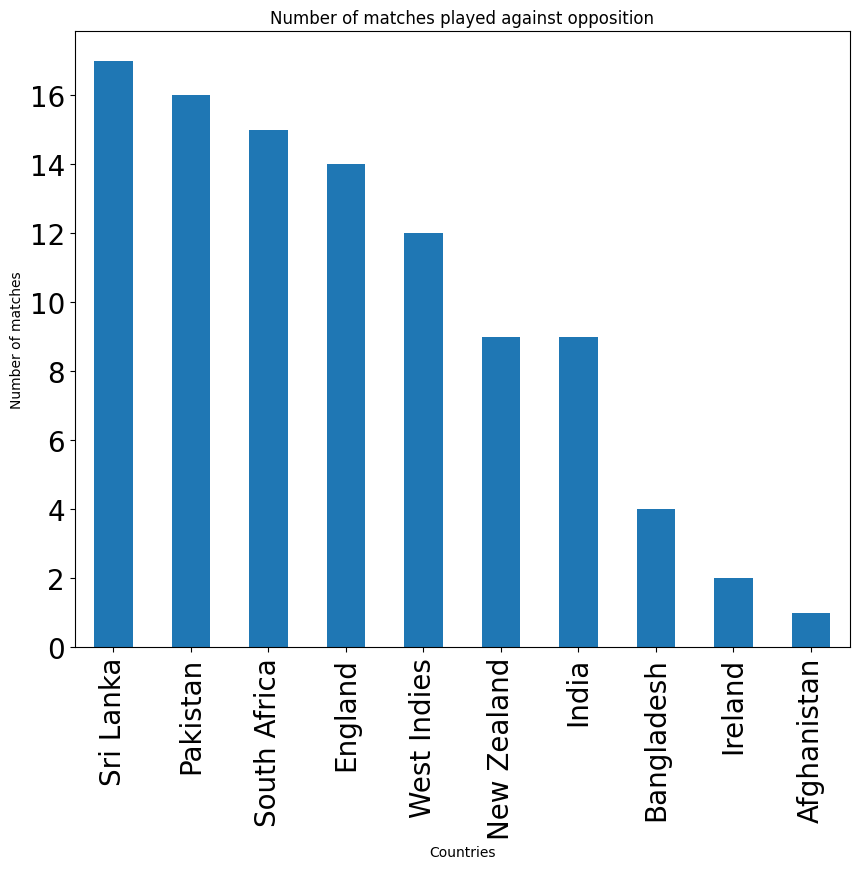

In [ ]:
newdata=DWdata['Opposition'].value_counts().plot(kind='bar',title='Number of matches played against opposition',figsize=(10,8))#Here VKdata['Opposition'].value_counts() is a new dataframe and we consider this dataframe to do the plot width=10, height=5
newdata.tick_params(axis='x',labelsize=20)
newdata.tick_params(axis='y',labelsize=20)
newdata.set_xlabel('Countries',fontsize=10)
newdata.set_ylabel('Number of matches',fontsize=10)


In [ ]:
newdata1

Sri Lanka       17
Pakistan        16
South Africa    15
England         14
West Indies     12
New Zealand      9
India            9
Bangladesh       4
Ireland          2
Afghanistan      1
Name: Opposition, dtype: int64

We can infer from the above that Warner has played the most number of matches
in his career against Sri Lanka(17)

# INNINGS PLAYED PER YEAR

Text(0, 0.5, 'Number of matches played')

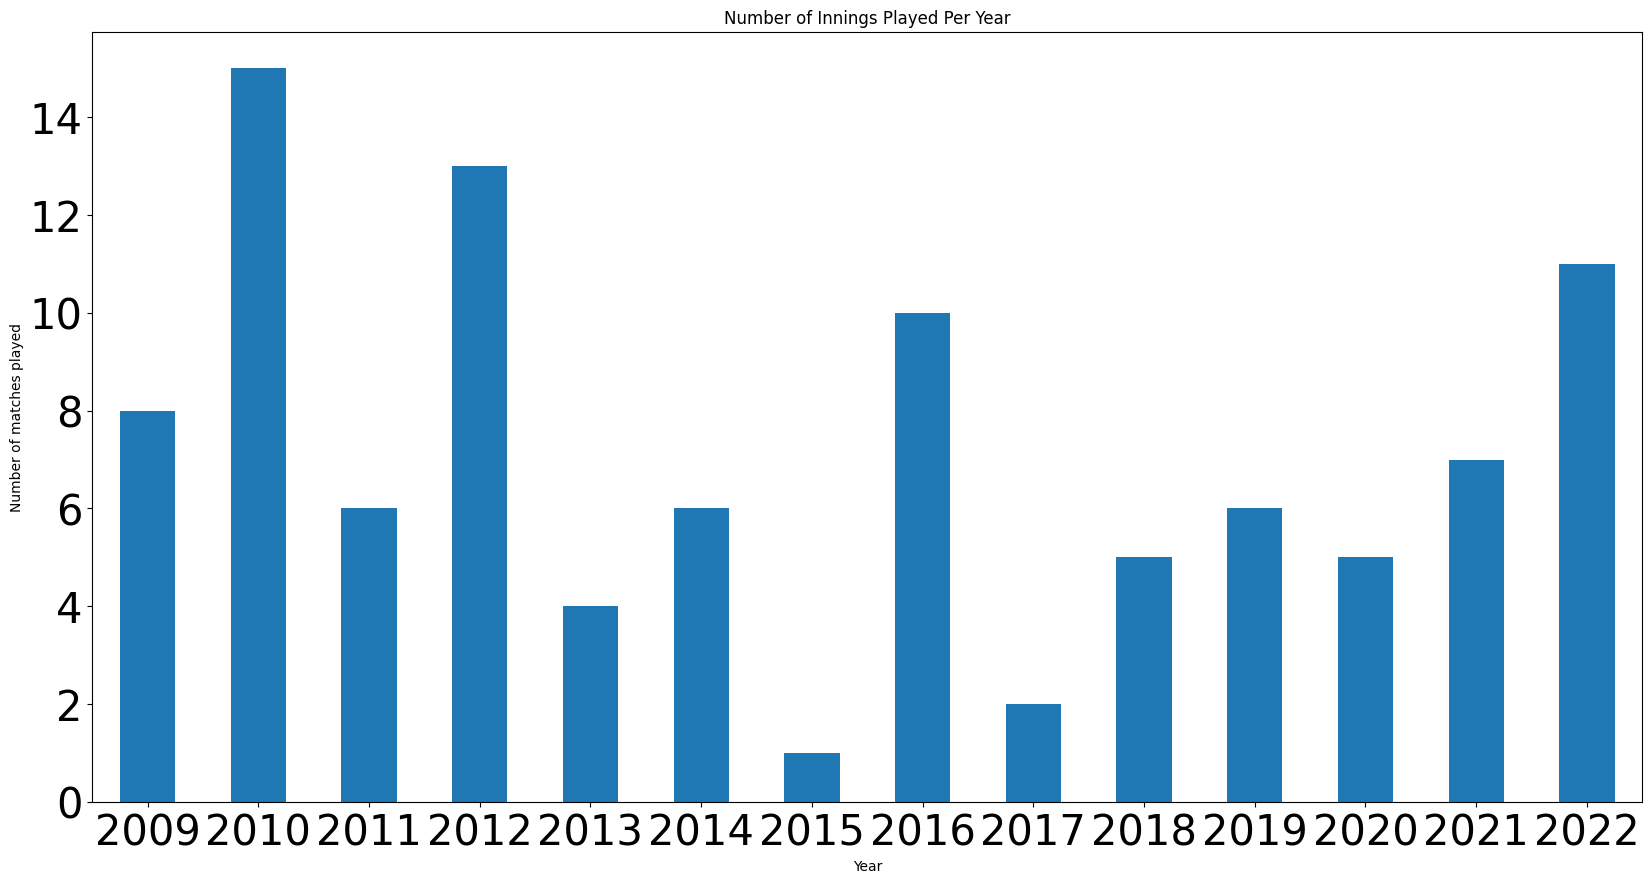

In [ ]:
DWdata['year'].value_counts().sort_index().plot(kind='bar',title='Number of Innings Played Per Year',figsize=(20,10))
DWdata['year'].value_counts().sort_index().plot().tick_params(axis='x',labelsize=30)
DWdata['year'].value_counts().sort_index().plot().tick_params(axis='y',labelsize=30)
DWdata['year'].value_counts().sort_index().plot().set_xlabel('Year',fontsize=10)
DWdata['year'].value_counts().sort_index().plot().set_ylabel('Number of matches played',fontsize=10)

In [ ]:
newdata=DWdata['year'].value_counts()
newdata

2010    15
2012    13
2022    11
2016    10
2009     8
2021     7
2011     6
2014     6
2019     6
2018     5
2020     5
2013     4
2017     2
2015     1
Name: year, dtype: int64

We can infer from the above that till now he has played the most number of innings in the year 2022.

# NUMBER OF RUNS SCORED PER YEAR

In [ ]:
a=DWdata.groupby('year')#Groups all the data by the year attribute

In [ ]:
a.first()#Gives the first value of every grouping

,Runs,BF,fours,sixes,SR,Dismissal,Opposition,Ground,Match Date,Notouts
year,,,,,,,,,,
2009,89,43,7,6,206,Caught,South Africa,Melbourne,2009-01-11,0
2010,24,14,1,1,171,Caught .,Pakistan,Melbourne,2010-02-05,0
2011,30,28,5,0,107,Caught,England,Adelaide,2011-01-12,0
2012,25,14,1,2,178,Caught,India,Sydney,2012-02-01,0
2013,90,62,5,3,145,not out,Sri Lanka,Sydney,2013-01-26,1
2014,40,16,5,2,250,lbw,South Africa,Durban,2014-03-12,0
2015,4,6,0,0,66,Caught,England,Cardiff,2015-08-31,0
2016,17,9,2,1,188,Caught,India,Adelaide,2016-01-26,0
2017,8,5,2,0,160,bowled,India,Ranchi,2017-10-07,0


Text(0, 0.5, 'Number of runs per year')

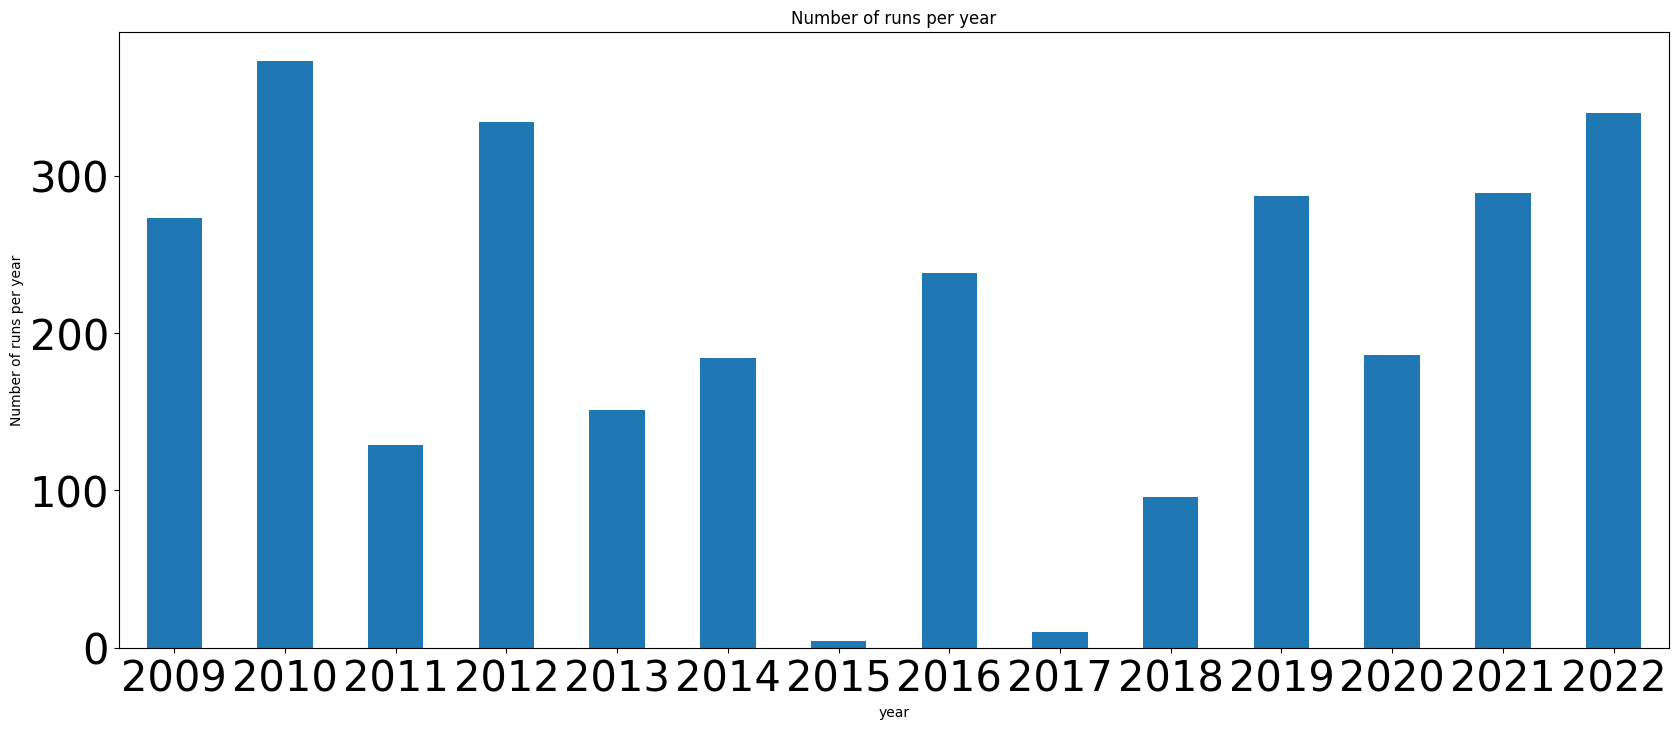

In [ ]:
a['Runs'].sum().plot(kind='bar',title='Number of runs per year',figsize=(20,8))
a['Runs'].sum().plot().tick_params(axis='x',labelsize=30)
a['Runs'].sum().plot().tick_params(axis='y',labelsize=30)
a['Runs'].sum().plot().set_xlabel('Countries',fontsize=10)
a['Runs'].sum().plot().set_ylabel('Number of runs per year',fontsize=10)

In [ ]:
total_runs_scored_per_year=a['Runs'].sum()

In [ ]:
total_runs_scored_per_year

year
2009    273
2010    373
2011    129
2012    334
2013    151
2014    184
2015      4
2016    238
2017     10
2018     96
2019    287
2020    186
2021    289
2022    340
Name: Runs, dtype: int64

By the Graph and The Above values, we can conclude that till now,2021 is the year in which Buttler has scored the maximum number of runs(589)

## NUMBER OF RUNS SCORED AGAINST EACH OPPOSITION

In [ ]:
b=DWdata.groupby('Opposition')

In [ ]:
b.first()

,Runs,BF,fours,sixes,SR,Dismissal,Ground,Match Date,Notouts,year
Opposition,,,,,,,,,,
Afghanistan,25,18,5,0,138,bowled,Adelaide,2022-11-04,0,2022
Bangladesh,16,11,2,1,145,Caught,Bridgetown,2010-05-05,0,2010
England,33,26,3,0,126,lbw,Manchester,2009-08-30,0,2009
India,72,42,2,7,171,Caught,Bridgetown,2010-05-07,0,2010
Ireland,26,23,4,0,113,Caught,Colombo (RPS),2012-09-19,0,2012
New Zealand,23,15,4,0,153,Caught,Sydney,2009-02-15,0,2009
Pakistan,24,14,1,1,171,Caught .,Melbourne,2010-02-05,0,2010
South Africa,89,43,7,6,206,Caught,Melbourne,2009-01-11,0,2009
Sri Lanka,0,3,0,0,0,Caught,Nottingham,2009-06-08,0,2009


Text(0, 0.5, 'Number of matches played')

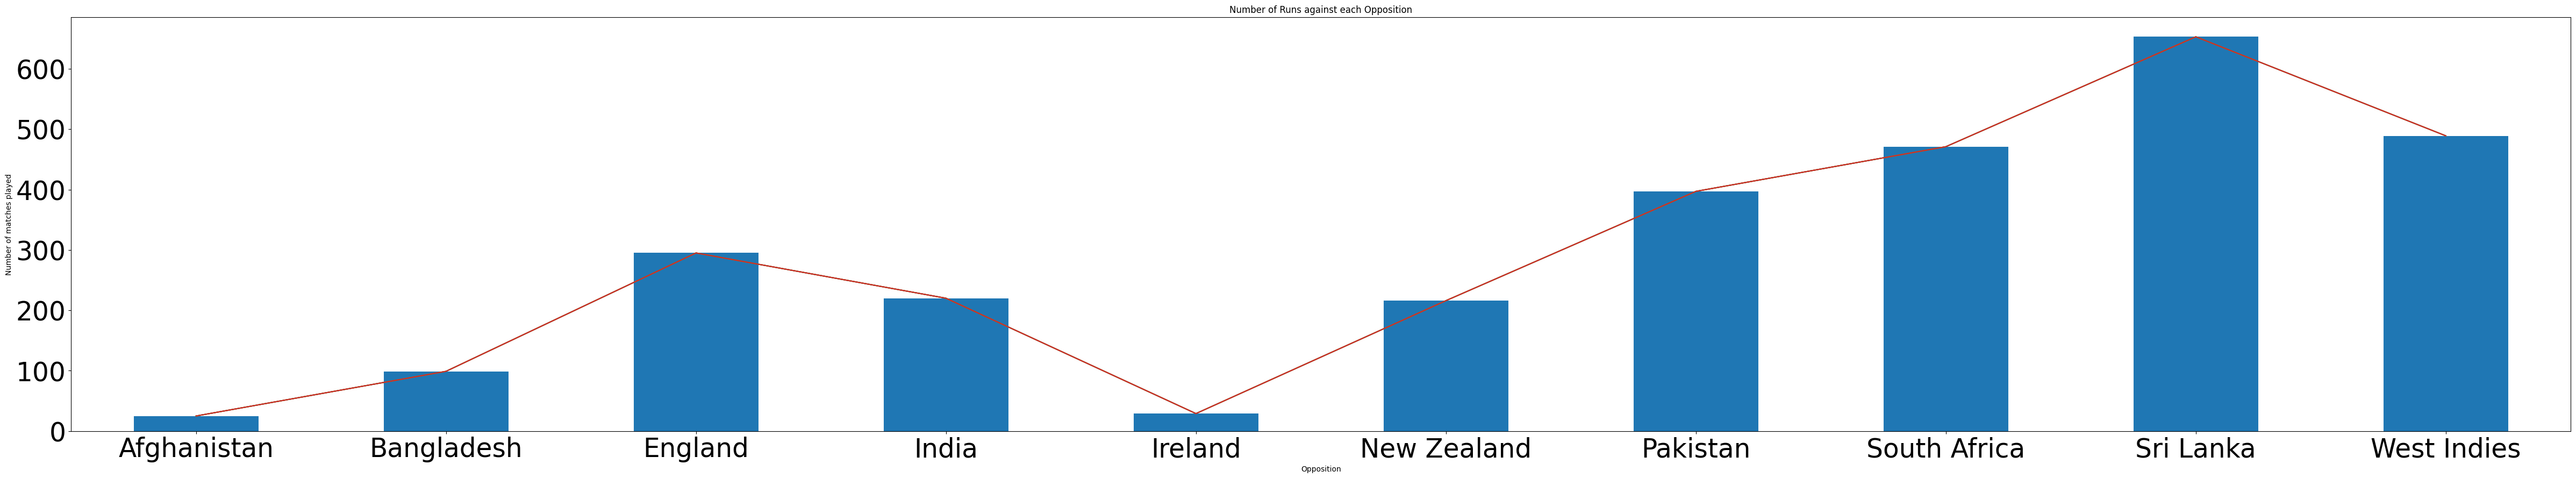

In [ ]:
b['Runs'].sum().plot(kind='bar',title='Number of Runs against each Opposition',figsize=(60,10))
b['Runs'].sum().plot().tick_params(axis='x',labelsize=35)
b['Runs'].sum().plot().tick_params(axis='y',labelsize=35)
b['Runs'].sum().plot().set_xlabel('Countries',fontsize=10)
b['Runs'].sum().plot().set_ylabel('Number of matches played',fontsize=10)

In [ ]:
b['Runs'].sum()

Opposition
Afghanistan      25
Bangladesh       99
England         295
India           220
Ireland          29
New Zealand     216
Pakistan        397
South Africa    471
Sri Lanka       653
West Indies     489
Name: Runs, dtype: int64

We can conclude that David Warner has scored the maximum number of runs against Australia.

# TOTAL RUNS IN ALL STADIUMS

In [ ]:
c=DWdata.groupby('Ground')

In [ ]:
c.first()#Displays the first of all the values

,Runs,BF,fours,sixes,SR,Dismissal,Opposition,Match Date,Notouts,year
Ground,,,,,,,,,,
Abu Dhabi,14,15,3,0,93,Caught,South Africa,2021-10-23,0,2021
Adelaide,30,28,5,0,107,Caught,England,2011-01-12,0,2011
Auckland,59,24,4,5,245,bowled,New Zealand,2018-02-16,0,2018
Bengaluru,17,9,1,1,188,Caught .,Bangladesh,2016-03-21,0,2016
Birmingham,41,31,6,0,132,bowled,Pakistan,2010-07-05,0,2010
Bridgetown,16,11,2,1,145,Caught,Bangladesh,2010-05-05,0,2010
Brisbane,7,12,0,0,58,bowled,South Africa,2009-01-13,0,2009
Canberra,20,11,4,0,181,bowled,Pakistan,2019-11-05,0,2019
Cape Town,0,1,0,0,0,run out,South Africa,2011-10-13,0,2011


<Axes: title={'center': 'Runs Scored at each venue'}, xlabel='Ground'>

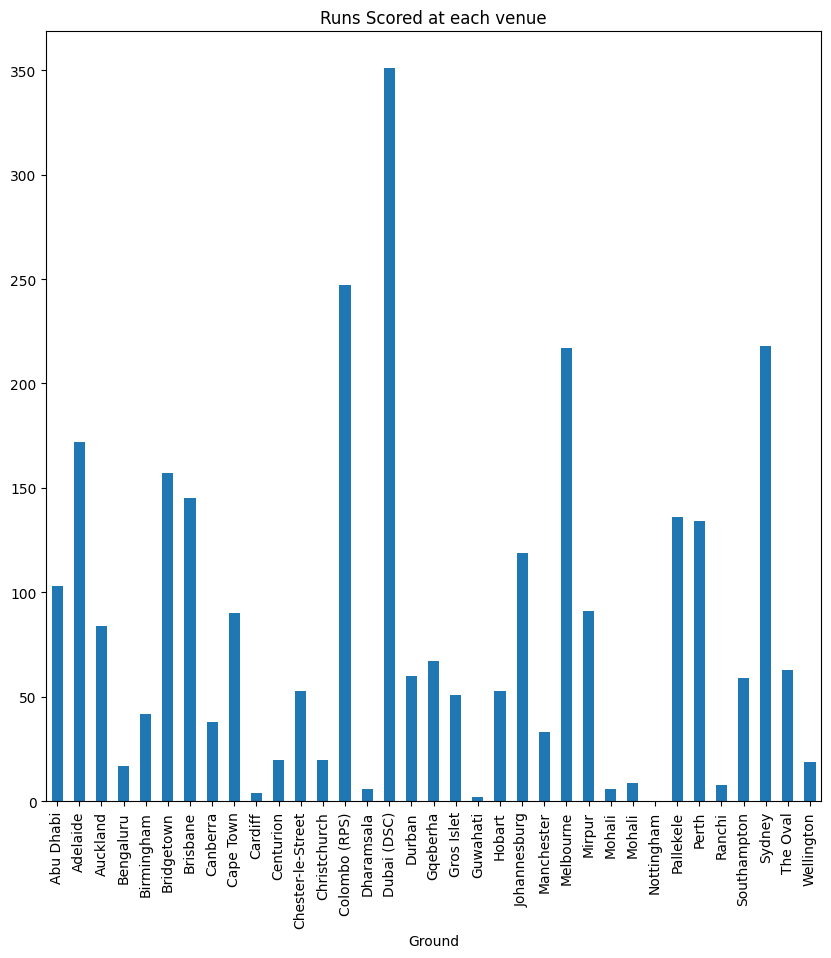

In [ ]:
c['Runs'].sum().plot(kind='bar',title='Runs Scored at each venue',figsize=(10,10))

In [ ]:
c['Runs'].sum()

Ground
Abu Dhabi            103
Adelaide             172
Auckland              84
Bengaluru             17
Birmingham            42
Bridgetown           157
Brisbane             145
Canberra              38
Cape Town             90
Cardiff                4
Centurion             20
Chester-le-Street     53
Christchurch          20
Colombo (RPS)        247
Dharamsala             6
Dubai (DSC)          351
Durban                60
Gqeberha              67
Gros Islet            51
Guwahati               2
Hobart                53
Johannesburg         119
Manchester            33
Melbourne            217
Mirpur                91
MohaIi                 6
Mohali                 9
Nottingham             0
Pallekele            136
Perth                134
Ranchi                 8
Southampton           59
Sydney               218
The Oval              63
Wellington            19
Name: Runs, dtype: int64

He has scored the maximum number of runs in Southampton(235)

# AVERAGE AGAINST ALL TEAMS

In [ ]:
runs_scored_opposition=pd.DataFrame(b['Runs'].sum())
runs_scored_opposition

,Runs
Opposition,
Afghanistan,25
Bangladesh,99
England,295
India,220
Ireland,29
New Zealand,216
Pakistan,397
South Africa,471
Sri Lanka,653


In [ ]:
total_innings_played=pd.DataFrame(b['Match Date'].count())
not_outs=pd.DataFrame(b['Notouts'].sum())
total_innings_played


,Match Date
Opposition,
Afghanistan,1
Bangladesh,4
England,14
India,9
Ireland,2
New Zealand,9
Pakistan,16
South Africa,15
Sri Lanka,17


In [ ]:
not_outs

,Notouts
Opposition,
Afghanistan,0
Bangladesh,0
England,0
India,1
Ireland,0
New Zealand,0
Pakistan,3
South Africa,1
Sri Lanka,5


In [ ]:
temp=runs_scored_opposition.merge(total_innings_played,left_index=True,right_index=True)

In [ ]:
temp

,Runs,Match Date
Opposition,,
Afghanistan,25,1
Bangladesh,99,4
England,295,14
India,220,9
Ireland,29,2
New Zealand,216,9
Pakistan,397,16
South Africa,471,15
Sri Lanka,653,17


In [ ]:
avg=temp.merge(not_outs,left_index=True,right_index=True)
avg

,Runs,Match Date,Notouts
Opposition,,,
Afghanistan,25,1,0
Bangladesh,99,4,0
England,295,14,0
India,220,9,1
Ireland,29,2,0
New Zealand,216,9,0
Pakistan,397,16,3
South Africa,471,15,1
Sri Lanka,653,17,5


In [ ]:
avg['eff_inns']=avg['Match Date']-avg['Notouts']

In [ ]:
avg

,Runs,Match Date,Notouts,eff_inns
Opposition,,,,
Afghanistan,25,1,0,1
Bangladesh,99,4,0,4
England,295,14,0,14
India,220,9,1,8
Ireland,29,2,0,2
New Zealand,216,9,0,9
Pakistan,397,16,3,13
South Africa,471,15,1,14
Sri Lanka,653,17,5,12


In [ ]:
avg['avg_against_opposition']=avg['Runs']/avg['eff_inns']

In [ ]:
type(avg['avg_against_opposition'])

pandas.core.series.Series

In [ ]:
avg

,Runs,Match Date,Notouts,eff_inns,avg_against_opposition
Opposition,,,,,
Afghanistan,25,1,0,1,25.000000
Bangladesh,99,4,0,4,24.750000
England,295,14,0,14,21.071429
India,220,9,1,8,27.500000
Ireland,29,2,0,2,14.500000
New Zealand,216,9,0,9,24.000000
Pakistan,397,16,3,13,30.538462
South Africa,471,15,1,14,33.642857
Sri Lanka,653,17,5,12,54.416667


<Axes: title={'center': 'Average Against Opposition'}, xlabel='Opposition'>

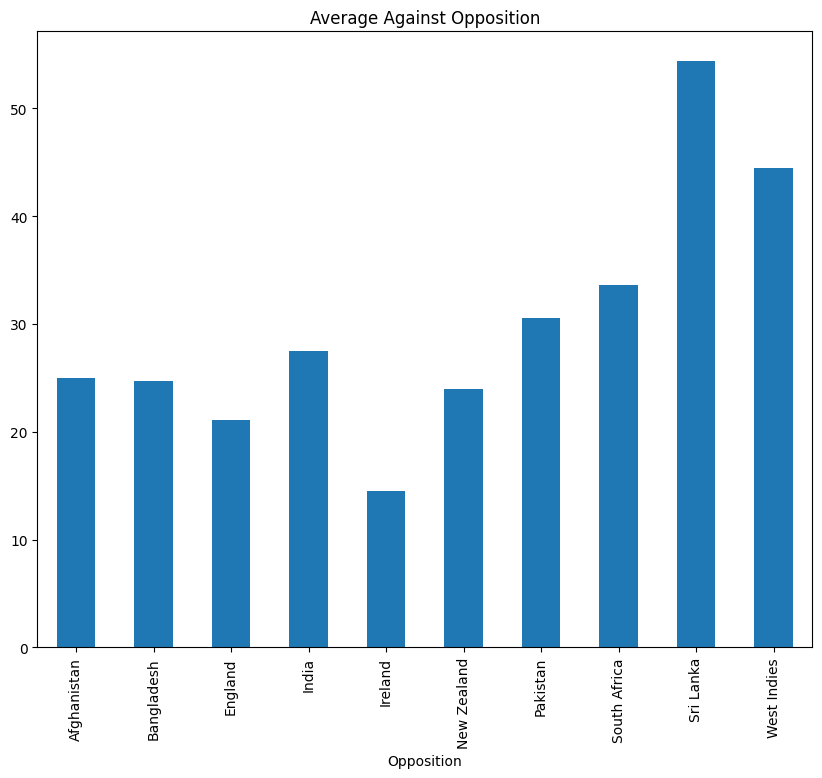

In [ ]:
avg['avg_against_opposition'].plot(kind='bar',title='Average Against Opposition',figsize=(10,8))#The average against Ireland and Scotland is infinite as he has not got out against these two teams

Buttler has his highest average against Sri Lanka(77)

# FOURS AGAINST ALL OPPONENTS

In [ ]:
type(b)

pandas.core.groupby.generic.DataFrameGroupBy

<Axes: title={'center': 'Number of fours against each Opposition'}, xlabel='Opposition'>

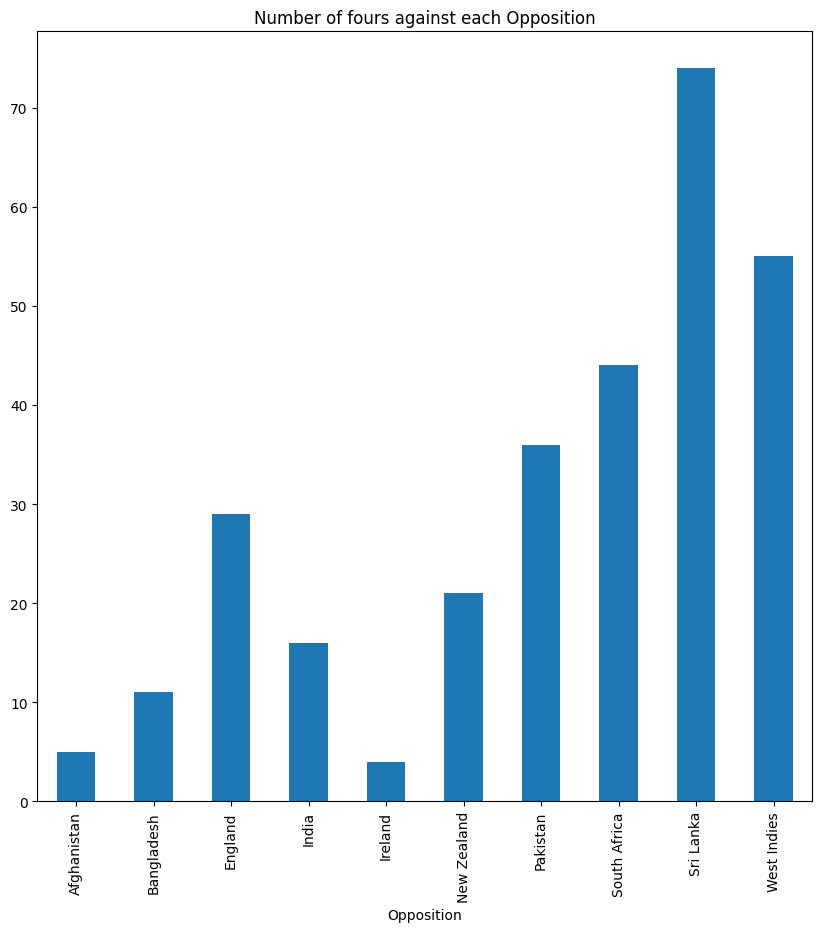

In [ ]:
b['fours'].sum().plot(kind='bar',title='Number of fours against each Opposition',figsize=(10,10))

This shows that David Warner has hit the most fours in his career against the Sri Lankan Cricket Team

# SIXES AGAINST ALL TEAMS

<Axes: title={'center': 'Number of sixes against each Opposition'}, xlabel='Opposition'>

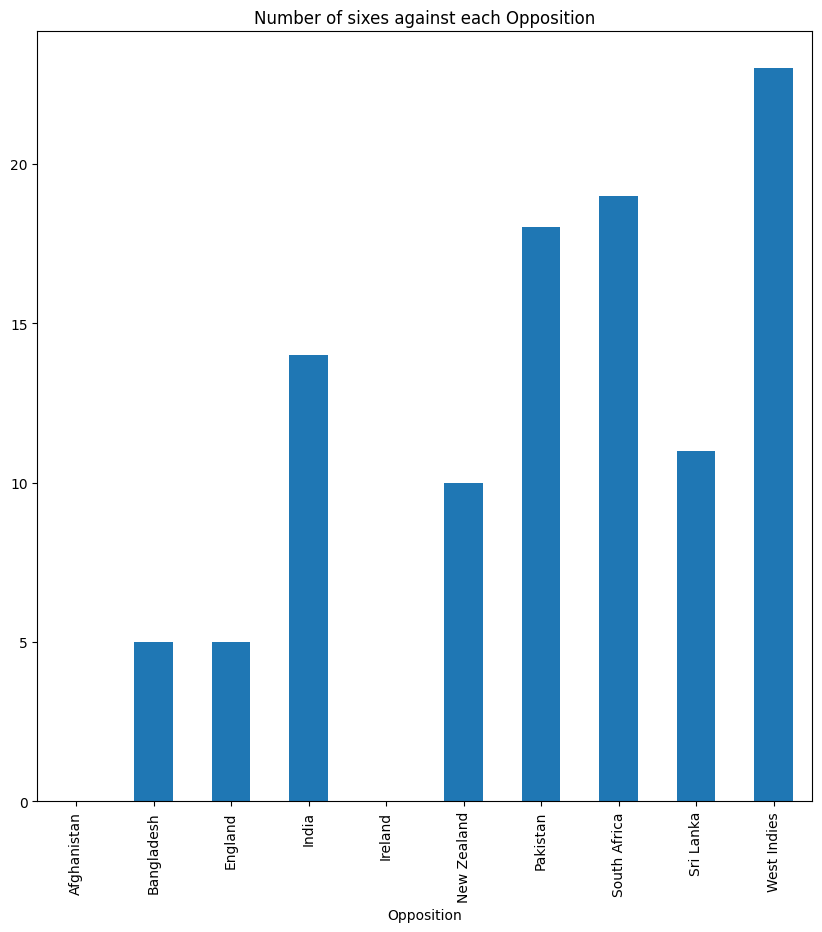

In [ ]:
b['sixes'].sum().plot(kind='bar',title='Number of sixes against each Opposition',figsize=(10,10))

In [ ]:
b['sixes'].sum()

Opposition
Afghanistan      0
Bangladesh       5
England          5
India           14
Ireland          0
New Zealand     10
Pakistan        18
South Africa    19
Sri Lanka       11
West Indies     23
Name: sixes, dtype: int64

By the above we can infer that he has hit the maximum number of sixes in his career against South Africa

# PIE CHART SHOWING THE PERCENTAGE OF FOURS AND SIXES IN HIS CAREER

In [ ]:
print(DWno_of_fours)
print(DWtotal_sixes)

295
105


In [ ]:
import plotly.express as px#An interactive Pie Plot is created
import numpy
boundaries=['FOURS','SIXES']
values=[DWno_of_fours,DWtotal_sixes]
fig = px.pie(values=values,names=boundaries)
fig.show()


#INTERACTIVE TIME SERIES GRAPH


In [ ]:
a.first()

,Runs,BF,fours,sixes,SR,Dismissal,Opposition,Ground,Match Date,Notouts
year,,,,,,,,,,
2009,89,43,7,6,206,Caught,South Africa,Melbourne,2009-01-11,0
2010,24,14,1,1,171,Caught .,Pakistan,Melbourne,2010-02-05,0
2011,30,28,5,0,107,Caught,England,Adelaide,2011-01-12,0
2012,25,14,1,2,178,Caught,India,Sydney,2012-02-01,0
2013,90,62,5,3,145,not out,Sri Lanka,Sydney,2013-01-26,1
2014,40,16,5,2,250,lbw,South Africa,Durban,2014-03-12,0
2015,4,6,0,0,66,Caught,England,Cardiff,2015-08-31,0
2016,17,9,2,1,188,Caught,India,Adelaide,2016-01-26,0
2017,8,5,2,0,160,bowled,India,Ranchi,2017-10-07,0


In [ ]:
df=a['Runs'].sum().reset_index(name='Runs')
df

,year,Runs
0,2009,273
1,2010,373
2,2011,129
3,2012,334
4,2013,151
5,2014,184
6,2015,4
7,2016,238
8,2017,10
9,2018,96


In [ ]:
df2=a['SR'].sum().reset_index(name='Strike Rate')

In [ ]:
df2

,year,Strike Rate
0,2009,925
1,2010,1928
2,2011,480
3,2012,1451
4,2013,407
5,2014,954
6,2015,66
7,2016,1420
8,2017,200
9,2018,678


In [ ]:
print(type(df2))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
df3=pd.DataFrame(a['Match Date'].count()).reset_index()
df3

,year,Match Date
0,2009,8
1,2010,15
2,2011,6
3,2012,13
4,2013,4
5,2014,6
6,2015,1
7,2016,10
8,2017,2
9,2018,5


In [ ]:
print(type(df3))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
df3.columns.tolist()

['year', 'Match Date']

In [ ]:
df2.columns.tolist()

['year', 'Strike Rate']

In [ ]:
df4=df2.merge(df3,left_index=True,right_index=True)

In [ ]:
df4

,year_x,Strike Rate,year_y,Match Date
0,2009,925,2009,8
1,2010,1928,2010,15
2,2011,480,2011,6
3,2012,1451,2012,13
4,2013,407,2013,4
5,2014,954,2014,6
6,2015,66,2015,1
7,2016,1420,2016,10
8,2017,200,2017,2
9,2018,678,2018,5


In [ ]:
df4=df4.drop("year_y",axis='columns')

In [ ]:
df4

,year_x,Strike Rate,Match Date
0,2009,925,8
1,2010,1928,15
2,2011,480,6
3,2012,1451,13
4,2013,407,4
5,2014,954,6
6,2015,66,1
7,2016,1420,10
8,2017,200,2
9,2018,678,5


In [ ]:
df4

,year_x,Strike Rate,Match Date
0,2009,925,8
1,2010,1928,15
2,2011,480,6
3,2012,1451,13
4,2013,407,4
5,2014,954,6
6,2015,66,1
7,2016,1420,10
8,2017,200,2
9,2018,678,5


In [ ]:
df4['Average SR']=df4['Strike Rate']/df4['Match Date']

In [ ]:
import plotly.express as px
fig=px.line(df,x='year',y='Runs')
fig.add_scatter(x=df4['year_x'],y=df4['Average SR'])
fig.show()

#CHI SQUARE TESTS

In [ ]:
DWdata['Opposition'].value_counts()

Sri Lanka       17
Pakistan        16
South Africa    15
England         14
West Indies     12
New Zealand      9
India            9
Bangladesh       4
Ireland          2
Afghanistan      1
Name: Opposition, dtype: int64

In [ ]:
DWdata['year'].value_counts()

2010    15
2012    13
2022    11
2016    10
2009     8
2021     7
2011     6
2014     6
2019     6
2018     5
2020     5
2013     4
2017     2
2015     1
Name: year, dtype: int64

In [ ]:
from scipy.stats import chi2_contingency
DWcrosstab=pd.crosstab(DWdata['Opposition'],DWdata['year'])
DWcrosstab

year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Opposition,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Bangladesh,0,1,0,0,0,1,0,1,0,0,0,0,1,0
England,1,1,2,0,2,0,1,0,0,2,0,2,1,2
India,0,1,0,3,0,1,0,2,2,0,0,0,0,0
Ireland,0,0,0,1,0,0,0,0,0,0,0,0,0,1
New Zealand,1,2,0,0,0,0,0,1,0,3,0,0,1,1
Pakistan,0,5,0,4,0,2,0,1,0,0,3,0,1,0
South Africa,4,0,2,1,0,1,0,3,0,0,0,3,1,0
Sri Lanka,1,2,2,0,2,0,0,2,0,0,3,0,1,4


In [ ]:
chi2_contingency(DWcrosstab)

Chi2ContingencyResult(statistic=154.4136599639856, pvalue=0.011678070314656307, dof=117, expected_freq=array([[0.08080808, 0.15151515, 0.06060606, 0.13131313, 0.04040404,
        0.06060606, 0.01010101, 0.1010101 , 0.02020202, 0.05050505,
        0.06060606, 0.05050505, 0.07070707, 0.11111111],
       [0.32323232, 0.60606061, 0.24242424, 0.52525253, 0.16161616,
        0.24242424, 0.04040404, 0.4040404 , 0.08080808, 0.2020202 ,
        0.24242424, 0.2020202 , 0.28282828, 0.44444444],
       [1.13131313, 2.12121212, 0.84848485, 1.83838384, 0.56565657,
        0.84848485, 0.14141414, 1.41414141, 0.28282828, 0.70707071,
        0.84848485, 0.70707071, 0.98989899, 1.55555556],
       [0.72727273, 1.36363636, 0.54545455, 1.18181818, 0.36363636,
        0.54545455, 0.09090909, 0.90909091, 0.18181818, 0.45454545,
        0.54545455, 0.45454545, 0.63636364, 1.        ],
       [0.16161616, 0.3030303 , 0.12121212, 0.26262626, 0.08080808,
        0.12121212, 0.02020202, 0.2020202 , 0.04040404, 0

# **VALUE PREDICTIONS**

In this section we train a Linear Regression model and we predict values using that model

## **PREDICTING TOTAL RUNS BASED ON THE YEAR(Single Linear Regression)**

In [ ]:
df4

,year_x,Strike Rate,Match Date,Average SR
0,2009,925,8,115.625000
1,2010,1928,15,128.533333
2,2011,480,6,80.000000
3,2012,1451,13,111.615385
4,2013,407,4,101.750000
5,2014,954,6,159.000000
6,2015,66,1,66.000000
7,2016,1420,10,142.000000
8,2017,200,2,100.000000
9,2018,678,5,135.600000


In [ ]:
df4.rename(columns={'year_x':'Year'},inplace=True)

In [ ]:
df4

,Year,Strike Rate,Match Date,Average SR
0,2009,925,8,115.625000
1,2010,1928,15,128.533333
2,2011,480,6,80.000000
3,2012,1451,13,111.615385
4,2013,407,4,101.750000
5,2014,954,6,159.000000
6,2015,66,1,66.000000
7,2016,1420,10,142.000000
8,2017,200,2,100.000000
9,2018,678,5,135.600000


In [ ]:
df4=df4.merge(df,left_index=True,right_index=True)

In [ ]:
df4

,Year,Strike Rate,Match Date,Average SR,year,Runs
0,2009,925,8,115.625000,2009,273
1,2010,1928,15,128.533333,2010,373
2,2011,480,6,80.000000,2011,129
3,2012,1451,13,111.615385,2012,334
4,2013,407,4,101.750000,2013,151
5,2014,954,6,159.000000,2014,184
6,2015,66,1,66.000000,2015,4
7,2016,1420,10,142.000000,2016,238
8,2017,200,2,100.000000,2017,10
9,2018,678,5,135.600000,2018,96


In [ ]:
df4=df4.drop('year',axis='columns')

In [ ]:
df4

,Year,Strike Rate,Match Date,Average SR,Runs
0,2009,925,8,115.625000,273
1,2010,1928,15,128.533333,373
2,2011,480,6,80.000000,129
3,2012,1451,13,111.615385,334
4,2013,407,4,101.750000,151
5,2014,954,6,159.000000,184
6,2015,66,1,66.000000,4
7,2016,1420,10,142.000000,238
8,2017,200,2,100.000000,10
9,2018,678,5,135.600000,96


In [ ]:
x=df4.iloc[:,:1].values
print(x)

[[2009]
 [2010]
 [2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]
 [2020]
 [2021]
 [2022]]


In [ ]:
print(type(x))

<class 'numpy.ndarray'>


In [ ]:
y=df4.iloc[:,4].values
print(y)

[273 373 129 334 151 184   4 238  10  96 287 186 289 340]


In [ ]:
print(type(y))

<class 'numpy.ndarray'>


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=2/4)
print(X_train)

[[2010]
 [2012]
 [2019]
 [2016]
 [2014]
 [2011]
 [2022]]


In [ ]:
print(X_test)

[[2018]
 [2020]
 [2017]
 [2009]
 [2015]
 [2021]
 [2013]]


In [ ]:
print(Y_train)

[373 334 287 238 184 129 340]


In [ ]:
print(Y_test)

[ 96 186  10 273   4 289 151]


Training the Model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

Visualize the Training Set result

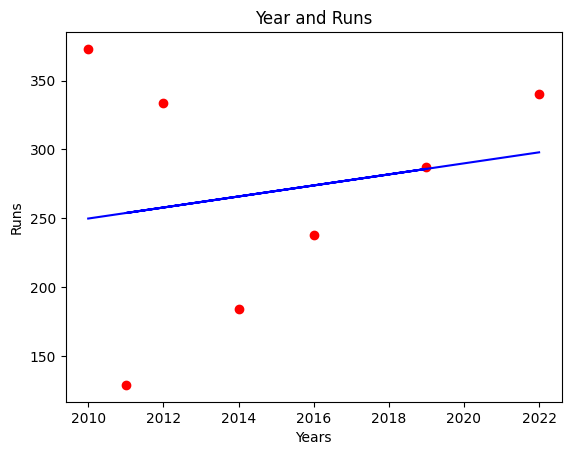

In [ ]:
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='Blue')
plt.title("Year and Runs")
plt.xlabel('Years')
plt.ylabel('Runs')
plt.show()

Predicting in Test Data

In [ ]:
y_pred=regressor.predict(X_test)
y_pred

array([281.8801956 , 289.89486553, 277.87286064, 245.81418093,
       269.85819071, 293.90220049, 261.84352078])

Visualizing the results in testing data

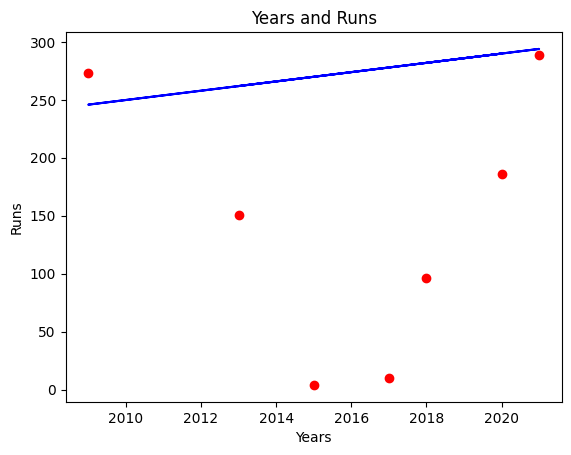

In [ ]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,regressor.predict(X_test),color='Blue')
plt.title("Years and Runs")
plt.xlabel('Years')
plt.ylabel('Runs')
plt.show()

In [ ]:
print(regressor.predict([[2023]]))

[301.91687042]


In [ ]:
sse=np.sum(y_pred-Y_test)**2
sse

831864.4151158893

In [ ]:
import numpy as np
print("Pearson's coefficient of correlation",regressor.coef_)

Pearson's coefficient of correlation [4.00733496]


<Axes: >

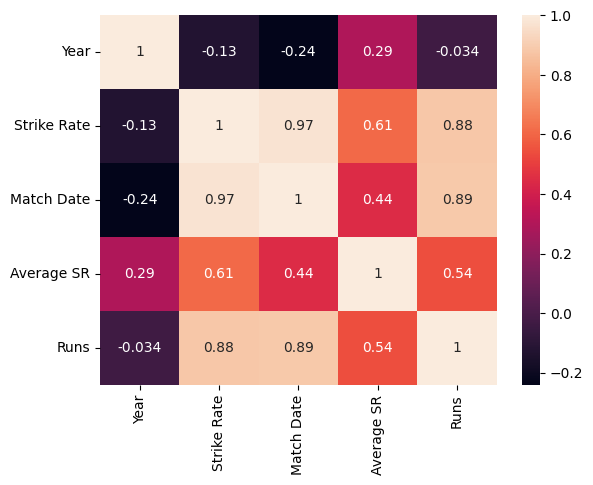

In [ ]:
import seaborn as sns
sns.heatmap(df4.corr(),annot=True)


By the HeatMap we can infer that Runs and Strike Rate have a great positive correlation

In [ ]:
df4

,Year,Strike Rate,Match Date,Average SR,Runs
0,2009,925,8,115.625000,273
1,2010,1928,15,128.533333,373
2,2011,480,6,80.000000,129
3,2012,1451,13,111.615385,334
4,2013,407,4,101.750000,151
5,2014,954,6,159.000000,184
6,2015,66,1,66.000000,4
7,2016,1420,10,142.000000,238
8,2017,200,2,100.000000,10
9,2018,678,5,135.600000,96


In [ ]:
df4.rename(columns={'Match Date':'Number of Matches'},inplace=True)

In [ ]:
df4

,Year,Strike Rate,Number of Matches,Average SR,Runs
0,2009,925,8,115.625000,273
1,2010,1928,15,128.533333,373
2,2011,480,6,80.000000,129
3,2012,1451,13,111.615385,334
4,2013,407,4,101.750000,151
5,2014,954,6,159.000000,184
6,2015,66,1,66.000000,4
7,2016,1420,10,142.000000,238
8,2017,200,2,100.000000,10
9,2018,678,5,135.600000,96


In [ ]:
df4.columns.to_list()

['Year', 'Strike Rate', 'Number of Matches', 'Average SR', 'Runs']

<Axes: >

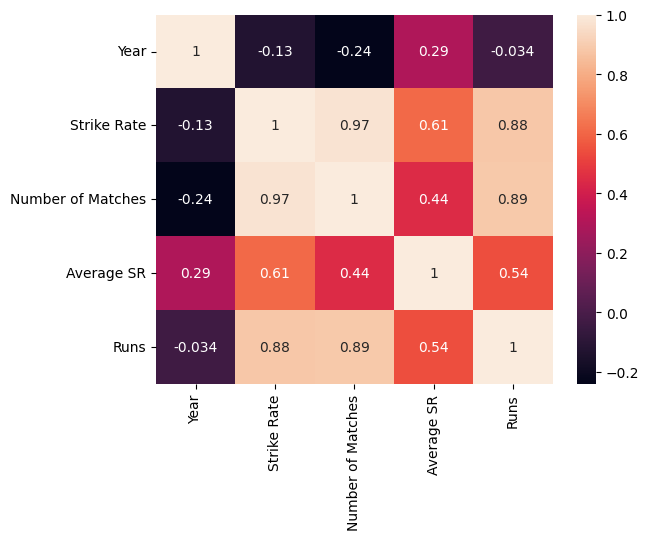

In [ ]:
import seaborn as sns
sns.heatmap(df4.corr(),annot=True)

## **MULTIPLE LINEAR REGRESSION(Considering Average Strike Rate and Total Matches played, predicting the number of runs)**

In [ ]:
df4

,Year,Strike Rate,Number of Matches,Average SR,Runs
0,2009,925,8,115.625000,273
1,2010,1928,15,128.533333,373
2,2011,480,6,80.000000,129
3,2012,1451,13,111.615385,334
4,2013,407,4,101.750000,151
5,2014,954,6,159.000000,184
6,2015,66,1,66.000000,4
7,2016,1420,10,142.000000,238
8,2017,200,2,100.000000,10
9,2018,678,5,135.600000,96


In [ ]:
df4.rename(columns={'Runs_x':'Runs'},inplace=True)

In [ ]:
df4

,Year,Strike Rate,Number of Matches,Average SR,Runs
0,2009,925,8,115.625000,273
1,2010,1928,15,128.533333,373
2,2011,480,6,80.000000,129
3,2012,1451,13,111.615385,334
4,2013,407,4,101.750000,151
5,2014,954,6,159.000000,184
6,2015,66,1,66.000000,4
7,2016,1420,10,142.000000,238
8,2017,200,2,100.000000,10
9,2018,678,5,135.600000,96


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
x=df4[['Number of Matches','Average SR']]
y=df4[['Runs']]

In [ ]:
type(x)

pandas.core.frame.DataFrame

In [ ]:
x

,Number of Matches,Average SR
0,8,115.625000
1,15,128.533333
2,6,80.000000
3,13,111.615385
4,4,101.750000
5,6,159.000000
6,1,66.000000
7,10,142.000000
8,2,100.000000
9,5,135.600000


In [ ]:
len(x)

14

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Number of Matches  14 non-null     int64  
 1   Average SR         14 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 352.0 bytes


In [ ]:
y

,Runs
0,273
1,373
2,129
3,334
4,151
5,184
6,4
7,238
8,10
9,96


Training the model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x.values,y.values)

LinearRegression()

Testing the model

In [ ]:
print(regressor.predict([[10,212]]))

[[358.50591181]]


In [ ]:
print(regressor.predict([[9,212]]))

[[334.65159149]]


In [ ]:
print(regressor.predict([[9,214]]))

[[336.39784589]]


In [ ]:
print(regressor.predict([[10,214]]))

[[360.25216621]]


Coefficient of correlation

In [ ]:
print(regressor.coef_)

[[23.85432033  0.8731272 ]]


The above shows that for every increase in the number of matches, the runs increase by 41 but whereas if the number of matches are same but average strike rate increases there is an increase of 3 approximately

# **MULTIPLE LINEAR REGRESSION**

In [ ]:
DWdata2

,Runs,Mins,BF,fours,sixes,SR,Pos,Innings,Opposition,Ground,Match Date,Notouts
0,89,64,43,7,6,206.97,2.0,1,v South Africa,Melbourne,2009-01-11 00:00:00,0
1,7,16,12,0,0,58.33,2.0,2,v South Africa,Brisbane,2009-01-13 00:00:00,0
2,23,19,15,4,0,153.33,1.0,1,v New Zealand,Sydney,2009-02-15 00:00:00,0
3,38,37,29,4,1,131.03,1.0,1,v South Africa,Johannesburg,2009-03-27 00:00:00,0
4,20,21,15,2,1,133.33,2.0,2,v South Africa,Centurion,2009-03-29 00:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
94,4,22,11,0,0,36.36,1.0,2,v England,Canberra,2022-10-12 00:00:00,0
95,5,7,6,1,0,83.33,1.0,2,v New Zealand,Sydney,2022-10-22 00:00:00,0
96,11,26,10,0,0,110.00,1.0,2,v Sri Lanka,Perth,2022-10-25 00:00:00,0
97,3,13,7,0,0,42.85,NaN,1,v Ireland,Brisbane,2022-10-31 00:00:00,0


In [ ]:
DWdata2.dtypes

Runs            int64
Mins           object
BF              int64
fours           int64
sixes           int64
SR            float64
Pos           float64
Innings         int64
Opposition     object
Ground         object
Match Date     object
Notouts         int64
dtype: object

In [ ]:
DWdata2=DWdata2.drop('Match Date',axis='columns')

In [ ]:
DWdata2

,Runs,Mins,BF,fours,sixes,SR,Pos,Innings,Opposition,Ground,Notouts
0,89,64,43,7,6,206.97,2.0,1,v South Africa,Melbourne,0
1,7,16,12,0,0,58.33,2.0,2,v South Africa,Brisbane,0
2,23,19,15,4,0,153.33,1.0,1,v New Zealand,Sydney,0
3,38,37,29,4,1,131.03,1.0,1,v South Africa,Johannesburg,0
4,20,21,15,2,1,133.33,2.0,2,v South Africa,Centurion,0
...,...,...,...,...,...,...,...,...,...,...,...
94,4,22,11,0,0,36.36,1.0,2,v England,Canberra,0
95,5,7,6,1,0,83.33,1.0,2,v New Zealand,Sydney,0
96,11,26,10,0,0,110.00,1.0,2,v Sri Lanka,Perth,0
97,3,13,7,0,0,42.85,NaN,1,v Ireland,Brisbane,0


In [ ]:
DWdata2['Mins']=DWdata2['Mins'].fillna(0)

In [ ]:
DWdata2['Mins']=DWdata2['Mins'].replace('-','0')

In [ ]:
DWdata2

,Runs,Mins,BF,fours,sixes,SR,Pos,Innings,Opposition,Ground,Notouts
0,89,64,43,7,6,206.97,2.0,1,v South Africa,Melbourne,0
1,7,16,12,0,0,58.33,2.0,2,v South Africa,Brisbane,0
2,23,19,15,4,0,153.33,1.0,1,v New Zealand,Sydney,0
3,38,37,29,4,1,131.03,1.0,1,v South Africa,Johannesburg,0
4,20,21,15,2,1,133.33,2.0,2,v South Africa,Centurion,0
...,...,...,...,...,...,...,...,...,...,...,...
94,4,22,11,0,0,36.36,1.0,2,v England,Canberra,0
95,5,7,6,1,0,83.33,1.0,2,v New Zealand,Sydney,0
96,11,26,10,0,0,110.00,1.0,2,v Sri Lanka,Perth,0
97,3,13,7,0,0,42.85,NaN,1,v Ireland,Brisbane,0


In [ ]:
DWdata2.dtypes

Runs            int64
Mins           object
BF              int64
fours           int64
sixes           int64
SR            float64
Pos           float64
Innings         int64
Opposition     object
Ground         object
Notouts         int64
dtype: object

In [ ]:
DWdata2['Mins']=DWdata2['Mins'].astype(int)

In [ ]:
DWdata2

,Runs,Mins,BF,fours,sixes,SR,Pos,Innings,Opposition,Ground,Notouts
0,89,64,43,7,6,206.97,2.0,1,v South Africa,Melbourne,0
1,7,16,12,0,0,58.33,2.0,2,v South Africa,Brisbane,0
2,23,19,15,4,0,153.33,1.0,1,v New Zealand,Sydney,0
3,38,37,29,4,1,131.03,1.0,1,v South Africa,Johannesburg,0
4,20,21,15,2,1,133.33,2.0,2,v South Africa,Centurion,0
...,...,...,...,...,...,...,...,...,...,...,...
94,4,22,11,0,0,36.36,1.0,2,v England,Canberra,0
95,5,7,6,1,0,83.33,1.0,2,v New Zealand,Sydney,0
96,11,26,10,0,0,110.00,1.0,2,v Sri Lanka,Perth,0
97,3,13,7,0,0,42.85,NaN,1,v Ireland,Brisbane,0


In [ ]:
DWdata2.dtypes

Runs            int64
Mins            int64
BF              int64
fours           int64
sixes           int64
SR            float64
Pos           float64
Innings         int64
Opposition     object
Ground         object
Notouts         int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

label=le.fit_transform(DWdata2['Opposition'])

In [ ]:
DWdata2=DWdata2.drop('Opposition',axis='columns')

DWdata2['Opposition']=label

In [ ]:
DWdata2

,Runs,Mins,BF,fours,sixes,SR,Pos,Innings,Ground,Notouts,Opposition
0,89,64,43,7,6,206.97,2.0,1,Melbourne,0,7
1,7,16,12,0,0,58.33,2.0,2,Brisbane,0,7
2,23,19,15,4,0,153.33,1.0,1,Sydney,0,5
3,38,37,29,4,1,131.03,1.0,1,Johannesburg,0,7
4,20,21,15,2,1,133.33,2.0,2,Centurion,0,7
...,...,...,...,...,...,...,...,...,...,...,...
94,4,22,11,0,0,36.36,1.0,2,Canberra,0,2
95,5,7,6,1,0,83.33,1.0,2,Sydney,0,5
96,11,26,10,0,0,110.00,1.0,2,Perth,0,8
97,3,13,7,0,0,42.85,NaN,1,Brisbane,0,4


In [ ]:
label2=le.fit_transform(DWdata2['Ground'])

DWdata2=DWdata2.drop('Ground',axis='columns')

DWdata2['Ground']=label2

In [ ]:
DWdata2

,Runs,Mins,BF,fours,sixes,SR,Pos,Innings,Notouts,Opposition,Ground
0,89,64,43,7,6,206.97,2.0,1,0,7,23
1,7,16,12,0,0,58.33,2.0,2,0,7,6
2,23,19,15,4,0,153.33,1.0,1,0,5,32
3,38,37,29,4,1,131.03,1.0,1,0,7,21
4,20,21,15,2,1,133.33,2.0,2,0,7,10
...,...,...,...,...,...,...,...,...,...,...,...
94,4,22,11,0,0,36.36,1.0,2,0,2,7
95,5,7,6,1,0,83.33,1.0,2,0,5,32
96,11,26,10,0,0,110.00,1.0,2,0,8,29
97,3,13,7,0,0,42.85,NaN,1,0,4,6


In [ ]:
DWdata2.dtypes

Runs            int64
Mins            int64
BF              int64
fours           int64
sixes           int64
SR            float64
Pos           float64
Innings         int64
Notouts         int64
Opposition      int64
Ground          int64
dtype: object

In [ ]:
X=DWdata2[['Runs','Mins','BF','fours','sixes','SR','Pos','Innings','Opposition','Ground']]

In [ ]:
X

,Runs,Mins,BF,fours,sixes,SR,Pos,Innings,Opposition,Ground
0,89,64,43,7,6,206.97,2.0,1,7,23
1,7,16,12,0,0,58.33,2.0,2,7,6
2,23,19,15,4,0,153.33,1.0,1,5,32
3,38,37,29,4,1,131.03,1.0,1,7,21
4,20,21,15,2,1,133.33,2.0,2,7,10
...,...,...,...,...,...,...,...,...,...,...
94,4,22,11,0,0,36.36,1.0,2,2,7
95,5,7,6,1,0,83.33,1.0,2,5,32
96,11,26,10,0,0,110.00,1.0,2,8,29
97,3,13,7,0,0,42.85,NaN,1,4,6


In [ ]:
Y=DWdata2[['Notouts']]

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
type(Y)

pandas.core.frame.DataFrame

In [ ]:
X=X.merge(Y,left_index=True,right_index=True)

In [ ]:
z=X.corr()

In [ ]:
type(z)

pandas.core.frame.DataFrame

In [ ]:
z.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, Runs to Notouts
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Runs        11 non-null     float64
 1   Mins        11 non-null     float64
 2   BF          11 non-null     float64
 3   fours       11 non-null     float64
 4   sixes       11 non-null     float64
 5   SR          11 non-null     float64
 6   Pos         11 non-null     float64
 7   Innings     11 non-null     float64
 8   Opposition  11 non-null     float64
 9   Ground      11 non-null     float64
 10  Notouts     11 non-null     float64
dtypes: float64(11)
memory usage: 1.3+ KB


In [ ]:
z

,Runs,Mins,BF,fours,sixes,SR,Pos,Innings,Opposition,Ground,Notouts
Runs,1.000000,0.754826,0.946041,0.855602,0.733792,0.553204,0.080205,0.003869,0.241014,-0.081605,0.468020
Mins,0.754826,1.000000,0.789283,0.614783,0.482432,0.317465,0.042835,0.072557,0.092161,-0.063502,0.207770
BF,0.946041,0.789283,1.000000,0.800381,0.572579,0.360444,0.039407,0.006702,0.207704,-0.064877,0.521368
fours,0.855602,0.614783,0.800381,1.000000,0.419623,0.568383,0.028036,0.017487,0.284645,-0.138080,0.402732
sixes,0.733792,0.482432,0.572579,0.419623,1.000000,0.514746,0.115335,-0.008707,0.125311,-0.075311,0.180439
SR,0.553204,0.317465,0.360444,0.568383,0.514746,1.000000,0.108647,0.060998,0.147240,-0.065785,0.068245
Pos,0.080205,0.042835,0.039407,0.028036,0.115335,0.108647,1.000000,-0.031823,0.057581,-0.051852,-0.079846
Innings,0.003869,0.072557,0.006702,0.017487,-0.008707,0.060998,-0.031823,1.000000,0.088544,-0.171446,0.146868
Opposition,0.241014,0.092161,0.207704,0.284645,0.125311,0.147240,0.057581,0.088544,1.000000,0.034860,0.191748
Ground,-0.081605,-0.063502,-0.064877,-0.138080,-0.075311,-0.065785,-0.051852,-0.171446,0.034860,1.000000,-0.020112


In [ ]:
X

,Runs,Mins,BF,fours,sixes,SR,Pos,Innings,Opposition,Ground,Notouts
0,89,64,43,7,6,206.97,2.0,1,7,23,0
1,7,16,12,0,0,58.33,2.0,2,7,6,0
2,23,19,15,4,0,153.33,1.0,1,5,32,0
3,38,37,29,4,1,131.03,1.0,1,7,21,0
4,20,21,15,2,1,133.33,2.0,2,7,10,0
...,...,...,...,...,...,...,...,...,...,...,...
94,4,22,11,0,0,36.36,1.0,2,2,7,0
95,5,7,6,1,0,83.33,1.0,2,5,32,0
96,11,26,10,0,0,110.00,1.0,2,8,29,0
97,3,13,7,0,0,42.85,NaN,1,4,6,0


<Axes: >

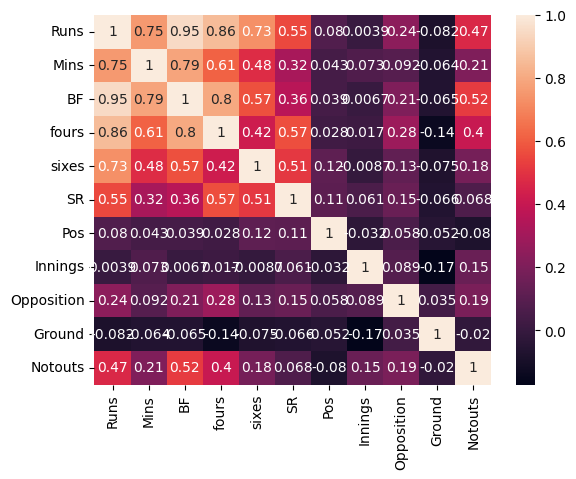

In [ ]:
import seaborn as sns
sns.heatmap(X.corr(),annot=True)

In [ ]:
X=X.drop('Ground',axis='columns')

In [ ]:
X=X.drop('Opposition',axis='columns')

In [ ]:
X=X.drop('Pos',axis='columns')

In [ ]:
X

,Runs,Mins,BF,fours,sixes,SR,Innings,Notouts
0,89,64,43,7,6,206.97,1,0
1,7,16,12,0,0,58.33,2,0
2,23,19,15,4,0,153.33,1,0
3,38,37,29,4,1,131.03,1,0
4,20,21,15,2,1,133.33,2,0
...,...,...,...,...,...,...,...,...
94,4,22,11,0,0,36.36,2,0
95,5,7,6,1,0,83.33,2,0
96,11,26,10,0,0,110.00,2,0
97,3,13,7,0,0,42.85,1,0


In [ ]:
x=X[['Runs','Mins','BF','fours','sixes','SR','Innings']]
y=X[['Notouts']]

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x.values,y.values)

LinearRegression()

In [ ]:
regressor.predict([[100,25,65,4,6,154,2]])

array([[1.10472678]])

# **IMPLEMENTING CLASSIFICATION ALGORITHMS FOR VARIOUS TRAIN TEST DATA**




# **Case 1:60-40 Train Test Ratio**



**Logistic Regression**

In [ ]:
x

,Runs,Mins,BF,fours,sixes,SR,Innings
0,89,64,43,7,6,206.97,1
1,7,16,12,0,0,58.33,2
2,23,19,15,4,0,153.33,1
3,38,37,29,4,1,131.03,1
4,20,21,15,2,1,133.33,2
...,...,...,...,...,...,...,...
94,4,22,11,0,0,36.36,2
95,5,7,6,1,0,83.33,2
96,11,26,10,0,0,110.00,2
97,3,13,7,0,0,42.85,1


In [ ]:
y

,Notouts
0,0
1,0
2,0
3,0
4,0
...,...
94,0
95,0
96,0
97,0


In [ ]:
from sklearn.model_selection import train_test_split
import random
random.seed()
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.40,random_state=0)

In [ ]:
X_train

,Runs,Mins,BF,fours,sixes,SR,Innings
1,7,16,12,0,0,58.33,2
61,28,0,16,5,0,175.00,1
42,90,91,62,5,3,145.16,1
41,1,4,3,0,0,33.33,2
4,20,21,15,2,1,133.33,2
15,72,54,42,2,7,171.42,1
17,25,14,12,4,1,208.33,2
40,8,20,13,1,0,61.53,2
38,63,60,41,7,3,153.65,2
5,63,71,53,6,1,118.86,1


In [ ]:
X_test

,Runs,Mins,BF,fours,sixes,SR,Innings
26,16,29,18,2,0,88.88,2
86,49,57,30,3,3,163.33,2
2,23,19,15,4,0,153.33,1
55,77,67,40,6,5,192.50,2
75,48,0,35,4,2,137.14,2
92,75,59,41,10,3,182.92,1
16,9,24,12,1,0,75.00,1
73,2,0,4,0,0,50.00,2
54,20,15,11,3,1,181.81,1
94,4,22,11,0,0,36.36,2


In [ ]:
Y_train

,Notouts
1,0
61,0
42,1
41,0
4,0
15,0
17,0
40,0
38,1
5,0


In [ ]:
Y_test

,Notouts
26,0
86,0
2,0
55,0
75,1
92,0
16,0
73,1
54,0
94,0


In [ ]:
from sklearn.preprocessing import StandardScaler
stdscaler=StandardScaler()
x_train=stdscaler.fit_transform(X_train)
x_test=stdscaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticreg=LogisticRegression()
logisticreg.fit(x_train,Y_train.values.ravel())
Y_pred=logisticreg.predict(x_test)

In [ ]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
Confusionmatrix=metrics.confusion_matrix(Y_test,Y_pred)

In [ ]:
Confusionmatrix

array([[35,  1],
       [ 3,  1]])

In [ ]:
logisticregaccuracy=logisticreg.score(x_test,Y_test)

In [ ]:
logisticregaccuracy

0.9

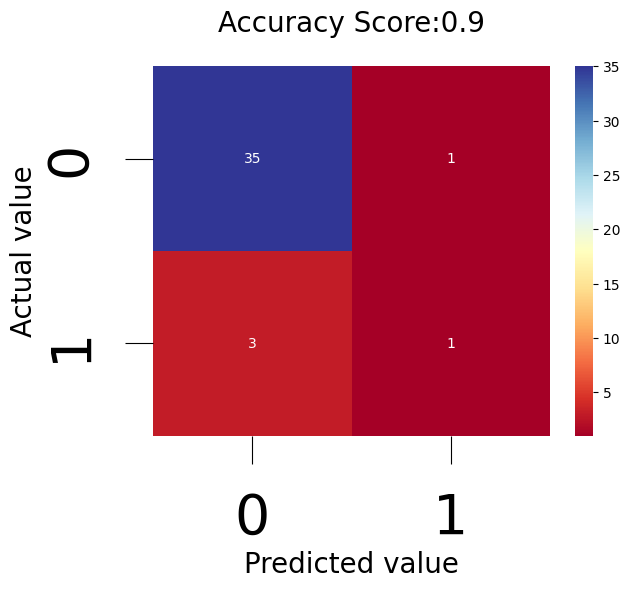

In [ ]:
sns.heatmap(Confusionmatrix,xticklabels='auto',yticklabels='auto',annot=True,cmap='RdYlBu')
plt.ylabel("Actual value",fontsize=20)
plt.xlabel("Predicted value",fontsize=20)
plt.title("Accuracy Score:{0}".format(logisticreg.score(x_test,Y_test)),fontsize=20,pad=25)
plt.tick_params(axis='both',labelsize=40,pad=20,length=20)

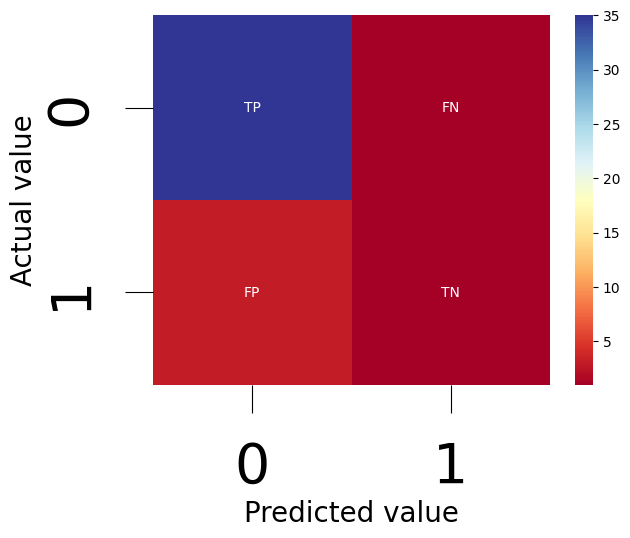

In [ ]:
text=np.array([['TP','FN'],['FP','TN']])
sns.heatmap(Confusionmatrix,xticklabels='auto',yticklabels='auto',annot=text,fmt="",cmap='RdYlBu')
plt.ylabel("Actual value",fontsize=20)
plt.xlabel("Predicted value",fontsize=20)
plt.tick_params(axis='both',labelsize=40,pad=20,length=20)

**SVM**

In [ ]:
from sklearn.model_selection import train_test_split
import random
random.seed()
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.40,random_state=0)


In [ ]:
X_train

,Runs,Mins,BF,fours,sixes,SR,Innings
1,7,16,12,0,0,58.33,2
61,28,0,16,5,0,175.00,1
42,90,91,62,5,3,145.16,1
41,1,4,3,0,0,33.33,2
4,20,21,15,2,1,133.33,2
15,72,54,42,2,7,171.42,1
17,25,14,12,4,1,208.33,2
40,8,20,13,1,0,61.53,2
38,63,60,41,7,3,153.65,2
5,63,71,53,6,1,118.86,1


In [ ]:
X_test

,Runs,Mins,BF,fours,sixes,SR,Innings
26,16,29,18,2,0,88.88,2
86,49,57,30,3,3,163.33,2
2,23,19,15,4,0,153.33,1
55,77,67,40,6,5,192.50,2
75,48,0,35,4,2,137.14,2
92,75,59,41,10,3,182.92,1
16,9,24,12,1,0,75.00,1
73,2,0,4,0,0,50.00,2
54,20,15,11,3,1,181.81,1
94,4,22,11,0,0,36.36,2


In [ ]:
Y_train

,Notouts
1,0
61,0
42,1
41,0
4,0
15,0
17,0
40,0
38,1
5,0


In [ ]:
Y_test

,Notouts
26,0
86,0
2,0
55,0
75,1
92,0
16,0
73,1
54,0
94,0


In [ ]:
from sklearn.preprocessing import StandardScaler
stdscaler=StandardScaler()
x_train=stdscaler.fit_transform(X_train)
x_test=stdscaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC
SupportVectorMachine=SVC()
SupportVectorMachine.fit(x_train,Y_train.values.ravel())
Y_pred=SupportVectorMachine.predict(x_test)


In [ ]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
Confusionmatrix=metrics.confusion_matrix(Y_test,Y_pred)

In [ ]:
Confusionmatrix

array([[36,  0],
       [ 4,  0]])

In [ ]:
SVMacccuracyscore=SupportVectorMachine.score(x_test,Y_test)
SVMacccuracyscore

0.9

In [ ]:
SVMPrecision1=(Confusionmatrix[0][0])/(Confusionmatrix[0][0]+Confusionmatrix[1][0])
SVMPrecision1

0.9

In [ ]:
SVMRecall1=(Confusionmatrix[0][0])/(Confusionmatrix[0][0]+Confusionmatrix[0][1])
SVMRecall1

1.0

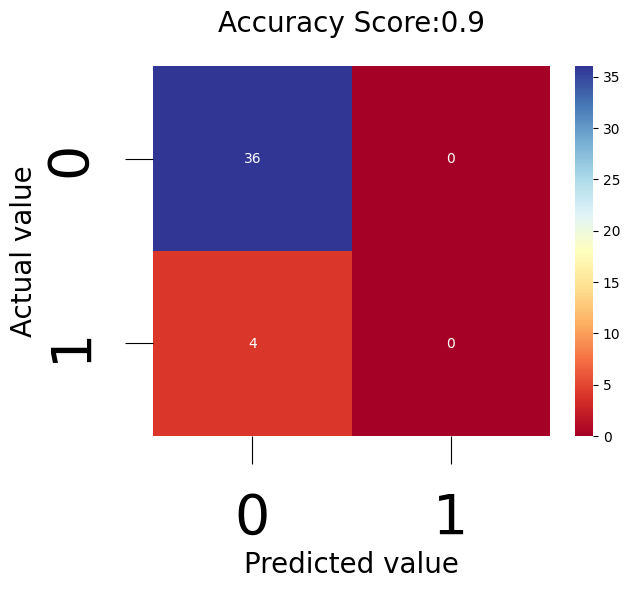

In [ ]:
sns.heatmap(Confusionmatrix,xticklabels='auto',yticklabels='auto',annot=True,cmap='RdYlBu')
plt.ylabel("Actual value",fontsize=20)
plt.xlabel("Predicted value",fontsize=20)
plt.title("Accuracy Score:{0}".format(SVMacccuracyscore),fontsize=20,pad=25)
plt.tick_params(axis='both',labelsize=40,pad=20,length=20)

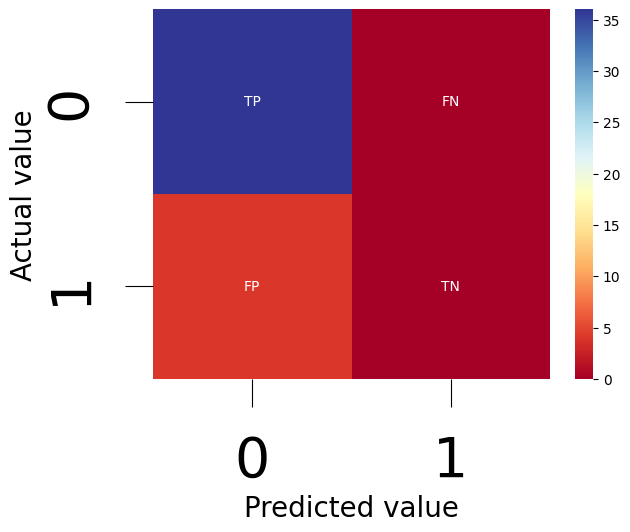

In [ ]:
text=np.array([['TP','FN'],['FP','TN']])
sns.heatmap(Confusionmatrix,xticklabels='auto',yticklabels='auto',annot=text,fmt="",cmap='RdYlBu')
plt.ylabel("Actual value",fontsize=20)
plt.xlabel("Predicted value",fontsize=20)
plt.tick_params(axis='both',labelsize=40,pad=20,length=20)

**Naive Bayes Classifier**

Split train-test-data

In [ ]:
from sklearn.model_selection import train_test_split
import random
random.seed()
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.40,random_state=0)

Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
stdscaler=StandardScaler()
x_train=stdscaler.fit_transform(X_train)
x_test=stdscaler.transform(X_test)

Naive Bayes Classification

In [ ]:
from sklearn.naive_bayes import GaussianNB
NaiveBayesClassifier=GaussianNB()
NaiveBayesClassifier.fit(x_train,Y_train.values.ravel())
Y_pred=NaiveBayesClassifier.predict(x_test)

In [ ]:
Y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Finding Confusion Matrix,Accuracy,Precision,Recall

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
Confusion_Matrix=metrics.confusion_matrix(Y_test,Y_pred)
Confusion_Matrix

array([[32,  4],
       [ 3,  1]])

In [ ]:
NaiveBayesAccuracy1=NaiveBayesClassifier.score(x_test,Y_test)
NaiveBayesAccuracy1

0.825

In [ ]:
NaiveBayesPrecision=(Confusion_Matrix[0][0])/(Confusion_Matrix[0][0]+Confusion_Matrix[1][0])
NaiveBayesPrecision

0.9142857142857143

In [ ]:
NaiveBayesRecall=(Confusion_Matrix[0][0])/(Confusion_Matrix[0][0]+Confusion_Matrix[0][1])
NaiveBayesRecall

0.8888888888888888

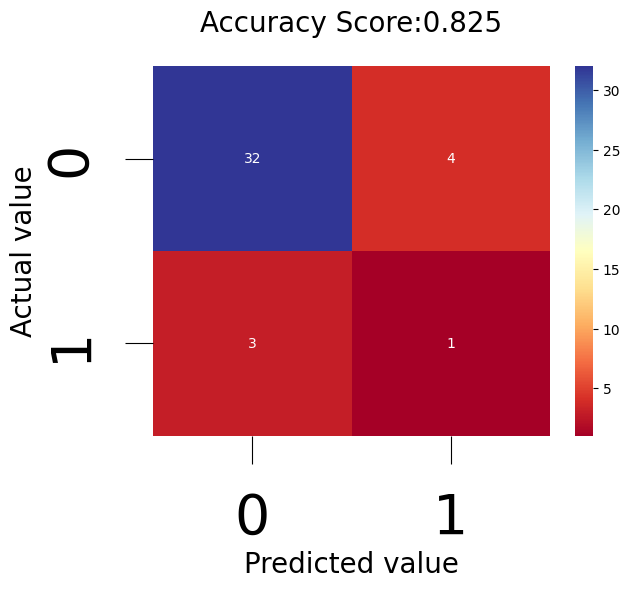

In [ ]:
sns.heatmap(Confusion_Matrix,xticklabels='auto',yticklabels='auto',annot=True,cmap='RdYlBu')
plt.ylabel("Actual value",fontsize=20)
plt.xlabel("Predicted value",fontsize=20)
plt.title("Accuracy Score:{0}".format(NaiveBayesAccuracy1),fontsize=20,pad=25)
plt.tick_params(axis='both',labelsize=40,pad=20,length=20)

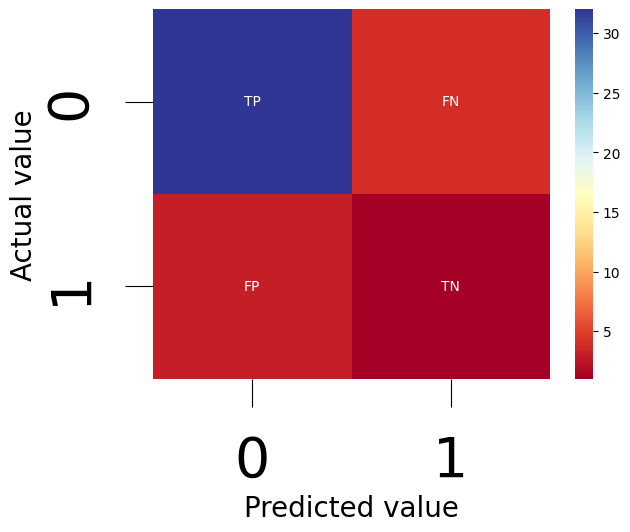

In [ ]:
text=np.array([['TP','FN'],['FP','TN']])
sns.heatmap(Confusion_Matrix,xticklabels='auto',yticklabels='auto',annot=text,fmt="",cmap='RdYlBu')
plt.ylabel("Actual value",fontsize=20)
plt.xlabel("Predicted value",fontsize=20)
plt.tick_params(axis='both',labelsize=40,pad=20,length=20)

# **Case 2:70:30 Train Test Ratio**

In [ ]:
x

,Runs,Mins,BF,fours,sixes,SR,Innings
0,89,64,43,7,6,206.97,1
1,7,16,12,0,0,58.33,2
2,23,19,15,4,0,153.33,1
3,38,37,29,4,1,131.03,1
4,20,21,15,2,1,133.33,2
...,...,...,...,...,...,...,...
94,4,22,11,0,0,36.36,2
95,5,7,6,1,0,83.33,2
96,11,26,10,0,0,110.00,2
97,3,13,7,0,0,42.85,1


In [ ]:
y

,Notouts
0,0
1,0
2,0
3,0
4,0
...,...
94,0
95,0
96,0
97,0


**Logistic Regression**

Splitting the training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
import random
random.seed()
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [ ]:
X_train

,Runs,Mins,BF,fours,sixes,SR,Innings
60,6,15,9,0,0,66.66,1
80,0,0,3,0,0,0.00,1
89,21,44,10,3,1,210.00,2
68,59,43,24,4,5,245.83,2
51,53,58,39,4,3,135.89,2
...,...,...,...,...,...,...,...
95,5,7,6,1,0,83.33,2
67,2,3,4,0,0,50.00,2
64,2,8,5,0,0,40.00,2
47,4,1,2,1,0,200.00,2


In [ ]:
X_test

,Runs,Mins,BF,fours,sixes,SR,Innings
26,16,29,18,2,0,88.88,2
86,49,57,30,3,3,163.33,2
2,23,19,15,4,0,153.33,1
55,77,67,40,6,5,192.50,2
75,48,0,35,4,2,137.14,2
92,75,59,41,10,3,182.92,1
16,9,24,12,1,0,75.00,1
73,2,0,4,0,0,50.00,2
54,20,15,11,3,1,181.81,1
94,4,22,11,0,0,36.36,2


In [ ]:
Y_train

,Notouts
60,0
80,0
89,0
68,0
51,1
...,...
95,0
67,0
64,0
47,0


In [ ]:
Y_test

,Notouts
26,0
86,0
2,0
55,0
75,1
92,0
16,0
73,1
54,0
94,0


Standardization of Data

In [ ]:
from sklearn.preprocessing import StandardScaler
Stdscal=StandardScaler()
x_train=Stdscal.fit_transform(X_train)
x_test=Stdscal.transform(X_test)

In [ ]:
x_train

array([[-8.59939698e-01, -4.97894668e-01, -6.96705993e-01,
        -1.08236096e+00, -6.61720822e-01, -8.56859128e-01,
        -1.51185789e+00],
       [-1.07875656e+00, -1.05863567e+00, -1.05192309e+00,
        -1.08236096e+00, -6.61720822e-01, -1.88389771e+00,
        -1.51185789e+00],
       [-3.12897542e-01,  5.86204604e-01, -6.37503144e-01,
         6.07447477e-02, -1.04906960e-01,  1.35159736e+00,
         6.61437828e-01],
       [ 1.07294259e+00,  5.48821870e-01,  1.91336744e-01,
         4.41779983e-01,  2.12234849e+00,  1.90363445e+00,
         6.61437828e-01],
       [ 8.54125723e-01,  1.10956287e+00,  1.07937948e+00,
         4.41779983e-01,  1.00872077e+00,  2.09775745e-01,
         6.61437828e-01],
       [-1.07875656e+00, -9.83870204e-01, -1.17032879e+00,
        -1.08236096e+00, -6.61720822e-01, -1.88389771e+00,
         6.61437828e-01],
       [-1.07875656e+00, -9.83870204e-01, -1.11112594e+00,
        -1.08236096e+00, -6.61720822e-01, -1.88389771e+00,
         6.6143782

In [ ]:
x_test

array([[-0.49524493,  0.0254636 , -0.16388035, -0.32029049, -0.66172082,
        -0.51451294,  0.66143783],
       [ 0.70824782,  1.07218014,  0.54655384,  0.06074475,  1.00872077,
         0.6325471 ,  0.66143783],
       [-0.23995859, -0.34836373, -0.3414889 ,  0.44177998, -0.66172082,
         0.47847591, -1.51185789],
       [ 1.72939317,  1.44600747,  1.13858233,  1.20385045,  2.12234849,
         1.08197277,  0.66143783],
       [ 0.67177834, -1.05863567,  0.84256809,  0.44177998,  0.4519069 ,
         0.22903464,  0.66143783],
       [ 1.65645422,  1.14694561,  1.19778518,  2.7279914 ,  1.00872077,
         0.93437257, -1.51185789],
       [-0.75053127, -0.16145007, -0.51909745, -0.70132572, -0.66172082,
        -0.72836375, -1.51185789],
       [-1.00581761, -1.05863567, -0.99272024, -1.08236096, -0.66172082,
        -1.11354174,  0.66143783],
       [-0.34936702, -0.49789467, -0.57830029,  0.06074475, -0.10490696,
         0.91727067, -1.51185789],
       [-0.93287865, -0.2362

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticreg=LogisticRegression()
logisticreg.fit(x_train,Y_train.values.ravel())
y_pred=logisticreg.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0])

Confusion Matrix,Accuracy, Precision, Recall determination

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
Confusion_Matrix=metrics.confusion_matrix(Y_test,y_pred)
Confusion_Matrix

array([[26,  1],
       [ 2,  1]])

In [ ]:
Logisticregressionaccuracy2=logisticreg.score(x_test,Y_test)
Logisticregressionaccuracy2

0.9

In [ ]:
Logregprecision=Confusion_Matrix[0][0]/(Confusion_Matrix[0][0]+Confusion_Matrix[1][0])
Logregprecision

0.9285714285714286

In [ ]:
Logregrecall=Confusion_Matrix[0][0]/(Confusion_Matrix[0][0]+Confusion_Matrix[0][1])
Logregrecall

0.9629629629629629

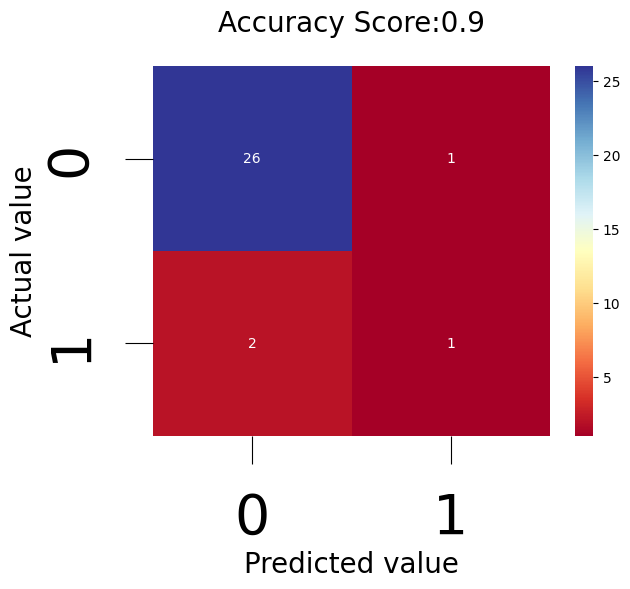

In [ ]:
sns.heatmap(Confusion_Matrix,xticklabels='auto',yticklabels='auto',annot=True,cmap='RdYlBu')
plt.ylabel("Actual value",fontsize=20)
plt.xlabel("Predicted value",fontsize=20)
plt.title("Accuracy Score:{0}".format(Logisticregressionaccuracy2),fontsize=20,pad=25)
plt.tick_params(axis='both',labelsize=40,pad=20,length=20)

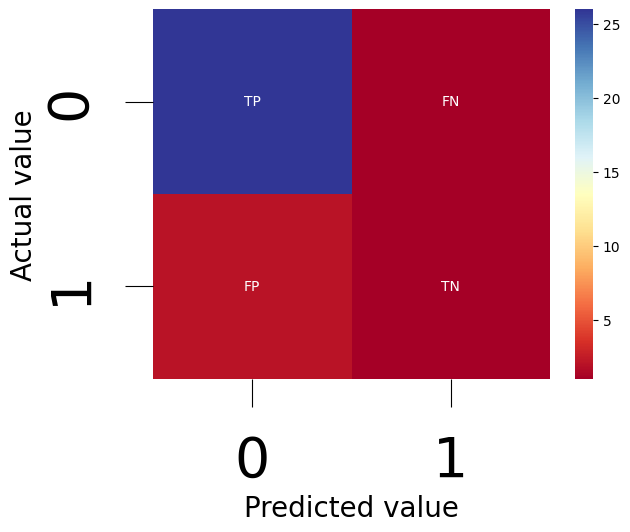

In [ ]:
text=np.array([['TP','FN'],['FP','TN']])
sns.heatmap(Confusion_Matrix,xticklabels='auto',yticklabels='auto',annot=text,fmt="",cmap='RdYlBu')
plt.ylabel("Actual value",fontsize=20)
plt.xlabel("Predicted value",fontsize=20)
plt.tick_params(axis='both',labelsize=40,pad=20,length=20)

**SVM**

Split the train test data

In [ ]:
from sklearn.model_selection import train_test_split
import random
random.seed()
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30,random_state=0)

Standardize the data

In [ ]:
from sklearn.preprocessing import StandardScaler
stdscaler=StandardScaler()
x_train=stdscaler.fit_transform(X_train)
x_test=stdscaler.transform(X_test)


Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,Y_train.values.ravel())
Y_pred=svm.predict(x_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

Finding Confusion Matrix,Accuracy, Precision and Recall

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
Confusion_Matrix=metrics.confusion_matrix(Y_test,Y_pred)
Confusion_Matrix

array([[27,  0],
       [ 3,  0]])

In [ ]:
svmaccuracy2=svm.score(x_test,Y_test)
svmaccuracy2

0.9

In [ ]:
svmprecision2=Confusion_Matrix[0][0]/(Confusion_Matrix[0][0]+Confusion_Matrix[1][0])
svmprecision2

0.9

In [ ]:
svmrecall2=Confusion_Matrix[0][0]/(Confusion_Matrix[0][0]+Confusion_Matrix[0][1])
svmrecall2

1.0

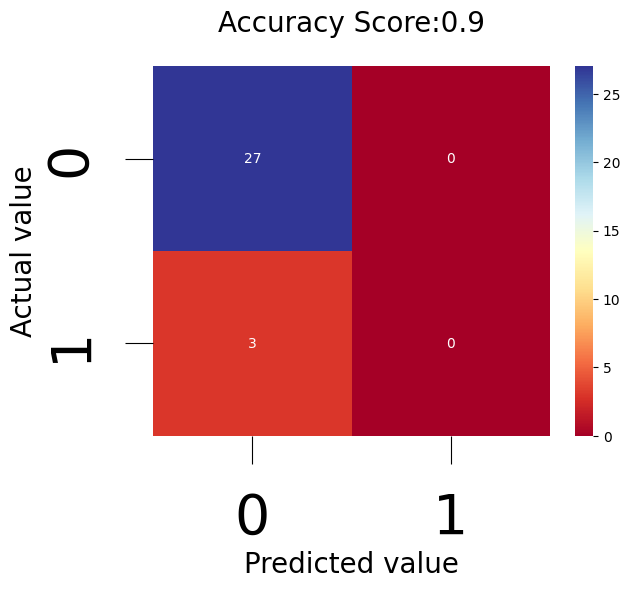

In [ ]:
sns.heatmap(Confusion_Matrix,xticklabels='auto',yticklabels='auto',annot=True,cmap='RdYlBu')
plt.ylabel("Actual value",fontsize=20)
plt.xlabel("Predicted value",fontsize=20)
plt.title("Accuracy Score:{0}".format(svmaccuracy2),fontsize=20,pad=25)
plt.tick_params(axis='both',labelsize=40,pad=20,length=20)


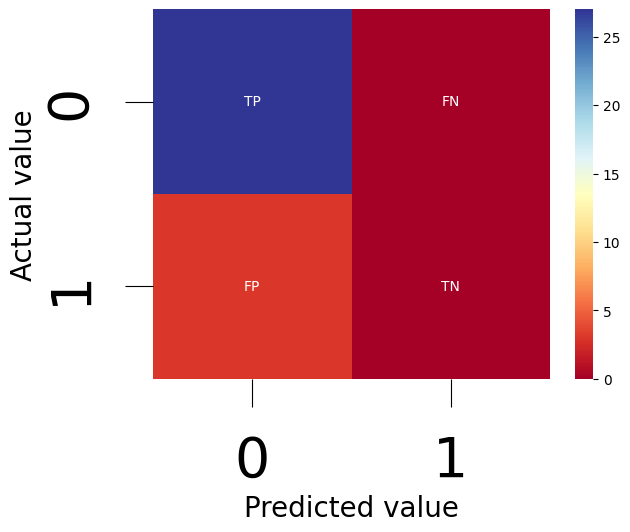

In [ ]:
text=np.array([['TP','FN'],['FP','TN']])
sns.heatmap(Confusion_Matrix,xticklabels='auto',yticklabels='auto',annot=text,fmt="",cmap='RdYlBu')
plt.ylabel("Actual value",fontsize=20)
plt.xlabel("Predicted value",fontsize=20)
plt.tick_params(axis='both',labelsize=40,pad=20,length=20)

**Naive Bayes Classifier**

Splitting the train and test data

In [ ]:
from sklearn.model_selection import train_test_split
import random
random.seed()
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30,random_state=0)

Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
stdscaler=StandardScaler()
x_train=stdscaler.fit_transform(X_train)
x_test=stdscaler.transform(X_test)

Naive Bayes Classification

In [ ]:
from sklearn.naive_bayes import GaussianNB
NaiveBayesClassifier=GaussianNB()
NaiveBayesClassifier.fit(x_train,Y_train.values.ravel())
Y_pred=NaiveBayesClassifier.predict(x_test)
Y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0])

**Finding confusion matrix,precision,accuracy,recall**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
Confusionmatrix=metrics.confusion_matrix(Y_test,Y_pred)
Confusionmatrix

array([[22,  5],
       [ 2,  1]])

In [ ]:
naivebayesaccuracy2=NaiveBayesClassifier.score(x_test,Y_test)
naivebayesaccuracy2

0.7666666666666667

In [ ]:
NaiveBayesPrecision=Confusionmatrix[0][0]/(Confusionmatrix[0][0]+Confusionmatrix[1][0])
NaiveBayesPrecision

0.9166666666666666

In [ ]:
NaiveBayesRecall=Confusionmatrix[0][0]/(Confusionmatrix[0][0]+Confusionmatrix[0][1])
NaiveBayesRecall

0.8148148148148148

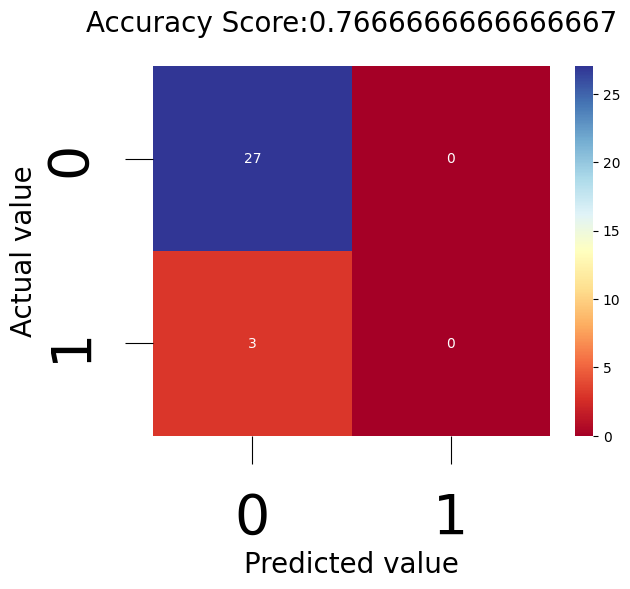

In [ ]:
sns.heatmap(Confusion_Matrix,xticklabels='auto',yticklabels='auto',annot=True,cmap='RdYlBu')
plt.ylabel("Actual value",fontsize=20)
plt.xlabel("Predicted value",fontsize=20)
plt.title("Accuracy Score:{0}".format(naivebayesaccuracy2),fontsize=20,pad=25)
plt.tick_params(axis='both',labelsize=40,pad=20,length=20)


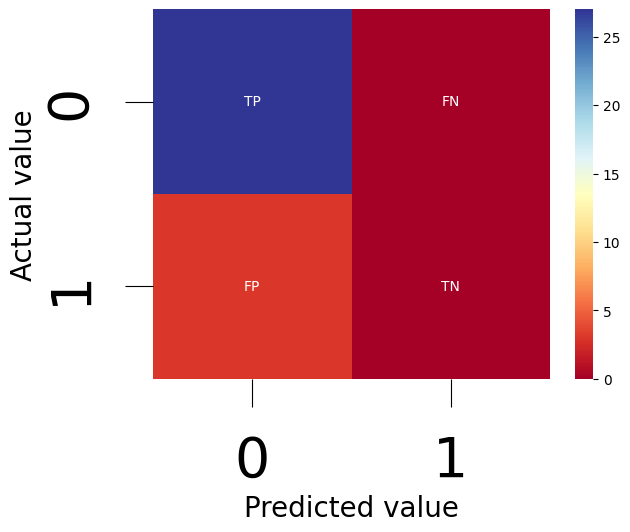

In [ ]:
text=np.array([['TP','FN'],['FP','TN']])
sns.heatmap(Confusion_Matrix,xticklabels='auto',yticklabels='auto',annot=text,fmt="",cmap='RdYlBu')
plt.ylabel("Actual value",fontsize=20)
plt.xlabel("Predicted value",fontsize=20)
plt.tick_params(axis='both',labelsize=40,pad=20,length=20)


#**Case 3: 80:20 Train Test Ratio**

**Logistic Regression**

Splitting the train test data

In [ ]:
from sklearn.model_selection import train_test_split
import random
random.seed()
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [ ]:
X_train

,Runs,Mins,BF,fours,sixes,SR,Innings
43,7,5,6,1,0,116.66,2
62,25,48,24,3,0,104.16,2
3,38,37,29,4,1,131.03,1
71,60,0,41,9,0,146.34,2
45,53,56,42,5,3,126.19,2
...,...,...,...,...,...,...,...
95,5,7,6,1,0,83.33,2
67,2,3,4,0,0,50.00,2
64,2,8,5,0,0,40.00,2
47,4,1,2,1,0,200.00,2


In [ ]:
X_test

,Runs,Mins,BF,fours,sixes,SR,Innings
26,16,29,18,2,0,88.88,2
86,49,57,30,3,3,163.33,2
2,23,19,15,4,0,153.33,1
55,77,67,40,6,5,192.50,2
75,48,0,35,4,2,137.14,2
92,75,59,41,10,3,182.92,1
16,9,24,12,1,0,75.00,1
73,2,0,4,0,0,50.00,2
54,20,15,11,3,1,181.81,1
94,4,22,11,0,0,36.36,2


In [ ]:
Y_train

,Notouts
43,0
62,0
3,0
71,1
45,0
...,...
95,0
67,0
64,0
47,0


In [ ]:
Y_test

,Notouts
26,0
86,0
2,0
55,0
75,1
92,0
16,0
73,1
54,0
94,0


Standardization of the data

In [ ]:
from sklearn.preprocessing import StandardScaler
stdscaler=StandardScaler()
x_train=stdscaler.fit_transform(X_train)
x_test=stdscaler.transform(X_test)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticregression=LogisticRegression()
logisticregression.fit(x_train,Y_train.values.ravel())
Y_pred=logisticregression.predict(x_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Finding the Confusion Matrix,Accuracy,Precision and Recall

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
Confusion_Matrix=metrics.confusion_matrix(Y_test,Y_pred)
Confusion_Matrix

array([[18,  0],
       [ 2,  0]])

In [ ]:
LogisticRegressionAccuracy3=logisticregression.score(x_test,Y_test)
LogisticRegressionAccuracy3

0.9

In [ ]:
Logisticregressionprecision=Confusionmatrix[0][0]/(Confusionmatrix[0][0]+Confusionmatrix[1][0])
Logisticregressionprecision

0.9166666666666666

In [ ]:
Logisticregressionrecall=Confusionmatrix[0][0]/(Confusionmatrix[0][0]+Confusionmatrix[0][1])
Logisticregressionrecall

0.8148148148148148

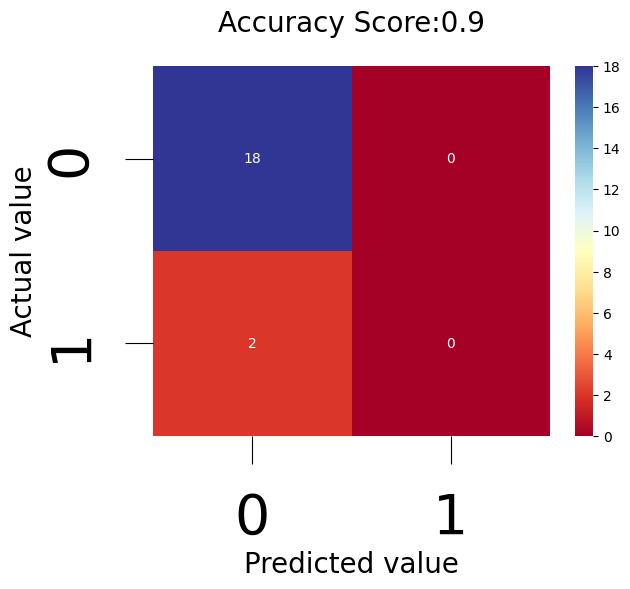

In [ ]:
sns.heatmap(Confusion_Matrix,xticklabels='auto',yticklabels='auto',annot=True,cmap='RdYlBu')
plt.ylabel("Actual value",fontsize=20)
plt.xlabel("Predicted value",fontsize=20)
plt.title("Accuracy Score:{0}".format(LogisticRegressionAccuracy3),fontsize=20,pad=25)
plt.tick_params(axis='both',labelsize=40,pad=20,length=20)

**SVM**

Split the train test data

In [ ]:
from sklearn.model_selection import train_test_split
import random
random.seed()
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.20,random_state=0)

Standardization of data

In [ ]:
from sklearn.preprocessing import StandardScaler
stdscaler=StandardScaler()
x_train=stdscaler.fit_transform(X_train)
x_test=stdscaler.transform(X_test)

Support Vector Machine Classification

In [ ]:
from sklearn.svm import SVC
Svm=SVC()
Svm.fit(x_train,Y_train.values.ravel())
Y_pred=Svm.predict(x_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Finding the confusion matrix,accuracy,precision,recall

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
Confusion_Matrix=metrics.confusion_matrix(Y_test,Y_pred)
Confusion_Matrix

array([[18,  0],
       [ 2,  0]])

In [ ]:
svmaccuracy3=svm.score(x_test,Y_test)
svmaccuracy3

0.9

In [ ]:
svmprecision=Confusion_Matrix[0][0]/(Confusion_Matrix[0][0]+Confusion_Matrix[1][0])
svmprecision

0.9

In [ ]:
svmrecall=Confusionmatrix[0][0]/(Confusionmatrix[0][0]+Confusionmatrix[0][1])
svmrecall

0.8148148148148148

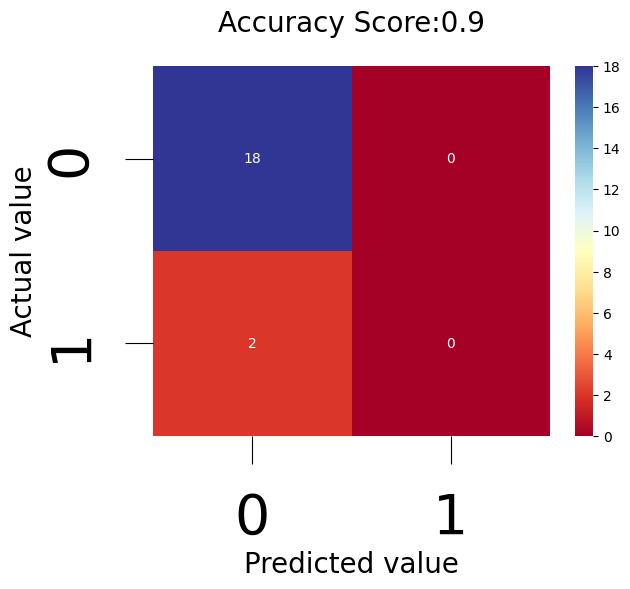

In [ ]:
sns.heatmap(Confusion_Matrix,xticklabels='auto',yticklabels='auto',annot=True,cmap='RdYlBu')
plt.ylabel("Actual value",fontsize=20)
plt.xlabel("Predicted value",fontsize=20)
plt.title("Accuracy Score:{0}".format(svmaccuracy3),fontsize=20,pad=25)
plt.tick_params(axis='both',labelsize=40,pad=20,length=20)

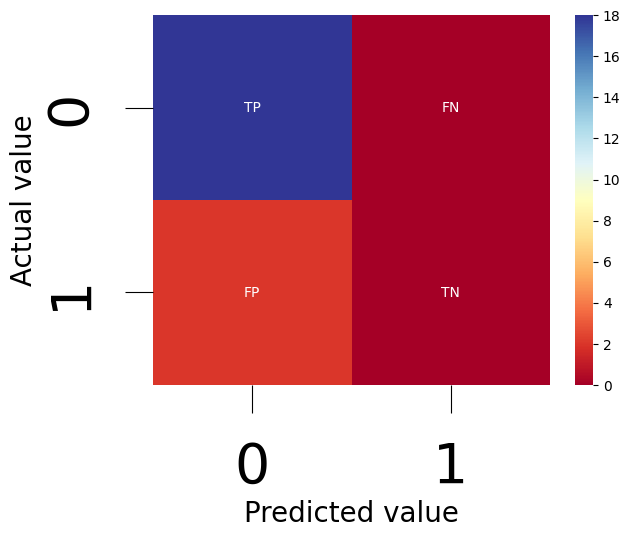

In [ ]:
text=np.array([['TP','FN'],['FP','TN']])
sns.heatmap(Confusion_Matrix,xticklabels='auto',yticklabels='auto',annot=text,fmt="",cmap='RdYlBu')
plt.ylabel("Actual value",fontsize=20)
plt.xlabel("Predicted value",fontsize=20)
plt.tick_params(axis='both',labelsize=40,pad=20,length=20)

**Naive Bayes Classification**

Split the train test data

In [ ]:
from sklearn.model_selection import train_test_split
import random
random.seed()
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.20,random_state=0)

Standardization of data

In [ ]:
from sklearn.preprocessing import StandardScaler
stdscaler=StandardScaler()
x_train=stdscaler.fit_transform(X_train)
x_test=stdscaler.transform(X_test)

Naive Bayes Classification

In [ ]:
from sklearn.naive_bayes import GaussianNB
NBC=GaussianNB()
NBC.fit(x_train,Y_train.values.ravel())
Y_pred=NBC.predict(x_test)
Y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

Finding the Confusion Matrix,Accuracy,Precision and Recall

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
Confusion_Matrix=metrics.confusion_matrix(Y_test,Y_pred)
Confusion_Matrix

array([[15,  3],
       [ 2,  0]])

In [ ]:
NBCaccuracy3=NBC.score(x_test,Y_test)
NBCaccuracy3

0.75

In [ ]:
NBCPrecision=Confusion_Matrix[0][0]/(Confusion_Matrix[0][0]+Confusion_Matrix[1][0])
NBCPrecision

0.8823529411764706

In [ ]:
NBCRecall=Confusionmatrix[0][0]/(Confusionmatrix[0][0]+Confusionmatrix[0][1])
NBCRecall

0.8148148148148148

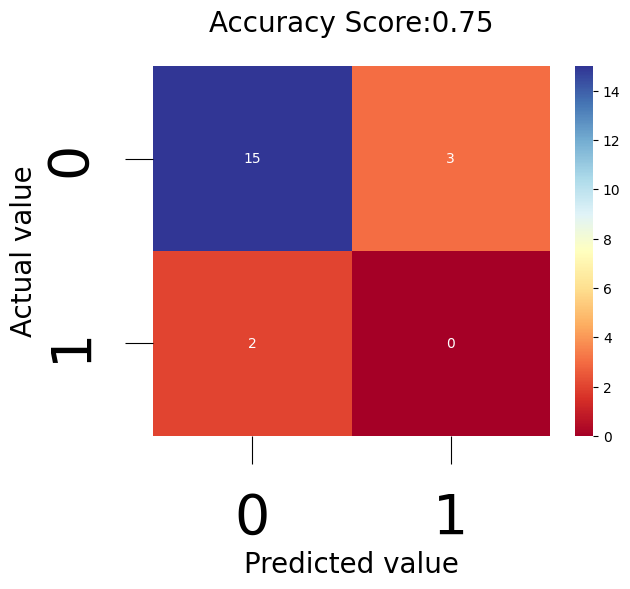

In [ ]:
sns.heatmap(Confusion_Matrix,xticklabels='auto',yticklabels='auto',annot=True,cmap='RdYlBu')
plt.ylabel("Actual value",fontsize=20)
plt.xlabel("Predicted value",fontsize=20)
plt.title("Accuracy Score:{0}".format(NBCaccuracy3),fontsize=20,pad=25)
plt.tick_params(axis='both',labelsize=40,pad=20,length=20)

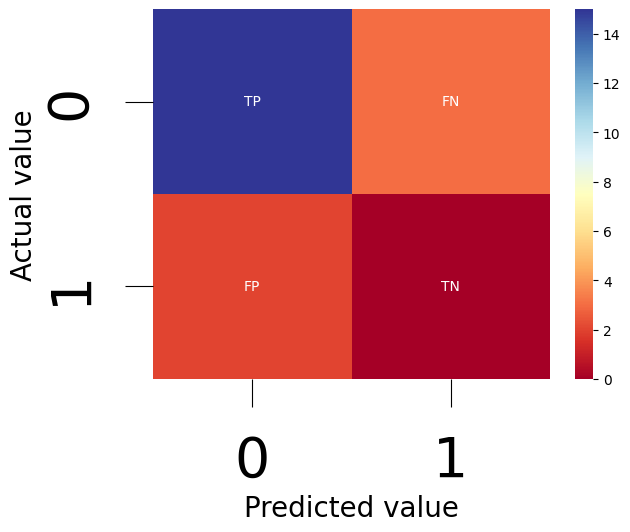

In [ ]:
text=np.array([['TP','FN'],['FP','TN']])
sns.heatmap(Confusion_Matrix,xticklabels='auto',yticklabels='auto',annot=text,fmt="",cmap='RdYlBu')
plt.ylabel("Actual value",fontsize=20)
plt.xlabel("Predicted value",fontsize=20)
plt.tick_params(axis='both',labelsize=40,pad=20,length=20)

# **Display of all the accuracies**

In [ ]:
row1=[logisticregaccuracy,Logisticregressionaccuracy2,LogisticRegressionAccuracy3]
row1

[0.9, 0.9, 0.9]

In [ ]:
row2=[SVMacccuracyscore,svmaccuracy2,svmaccuracy3]
row2

[0.9, 0.9, 0.9]

In [ ]:
row3=[NaiveBayesAccuracy1,naivebayesaccuracy2,NBCaccuracy3]
row3

[0.825, 0.7666666666666667, 0.75]

In [ ]:
col1=[logisticregaccuracy,SVMacccuracyscore,NaiveBayesAccuracy1]
col1

[0.9, 0.9, 0.825]

In [ ]:
col2=[Logisticregressionaccuracy2,svmaccuracy2,naivebayesaccuracy2]
col2

[0.9, 0.9, 0.7666666666666667]

In [ ]:
col3=[LogisticRegressionAccuracy3,svmaccuracy3,NBCaccuracy3]
col3

[0.9, 0.9, 0.75]

In [ ]:
tabledata={'60:40':col1,'70:30':col2,'80:20':col3}
df=pd.DataFrame(tabledata,index=['LOGISTIC REGRESSION','SVM','NAIVE BAYES'])
df

,60:40,70:30,80:20
LOGISTIC REGRESSION,0.900,0.900000,0.90
SVM,0.900,0.900000,0.90
NAIVE BAYES,0.825,0.766667,0.75


# **Cross Validation**

In [ ]:
x

,Runs,Mins,BF,fours,sixes,SR,Innings
0,89,64,43,7,6,206.97,1
1,7,16,12,0,0,58.33,2
2,23,19,15,4,0,153.33,1
3,38,37,29,4,1,131.03,1
4,20,21,15,2,1,133.33,2
...,...,...,...,...,...,...,...
94,4,22,11,0,0,36.36,2
95,5,7,6,1,0,83.33,2
96,11,26,10,0,0,110.00,2
97,3,13,7,0,0,42.85,1


In [ ]:
y

,Notouts
0,0
1,0
2,0
3,0
4,0
...,...
94,0
95,0
96,0
97,0


K-Fold for K=5

In [ ]:
from sklearn.model_selection import KFold

kf=KFold(n_splits=5)
from sklearn.linear_model import LogisticRegression
logisticreg=LogisticRegression(max_iter=10000)
count=0
sum=0
for train_index,test_index in kf.split(x):

  X_train,X_test=x.iloc[train_index],x.iloc[test_index]
  Y_train,Y_test=y.iloc[train_index],y.iloc[test_index]
  logisticreg.fit(X_train,Y_train.values.ravel())
  accuracy=logisticreg.score(X_test,Y_test)
  sum=sum+accuracy
  count=count+1
print('Final Value:',(sum/count))




Final Value: 0.9294736842105262


K-Fold for K=10

In [ ]:
from sklearn.model_selection import KFold

kf=KFold(n_splits=10)
from sklearn.linear_model import LogisticRegression
logisticreg=LogisticRegression(max_iter=10000)
count=0
sum=0
for train_index,test_index in kf.split(x):

  X_train,X_test=x.iloc[train_index],x.iloc[test_index]
  Y_train,Y_test=y.iloc[train_index],y.iloc[test_index]
  logisticreg.fit(X_train,Y_train.values.ravel())
  accuracy=logisticreg.score(X_test,Y_test)
  sum=sum+accuracy
  count=count+1
print('Final Value:',(sum/count))





Final Value: 0.93


# **K NEAREST NEIGHBOUR(KNN) IMPLEMENTATION FOR DIFFERENT TRAIN TEST RATIOS**

## **Case 1: 60:40 Train-Test ratio**

In [ ]:
x

,Runs,Mins,BF,fours,sixes,SR,Innings
0,89,64,43,7,6,206.97,1
1,7,16,12,0,0,58.33,2
2,23,19,15,4,0,153.33,1
3,38,37,29,4,1,131.03,1
4,20,21,15,2,1,133.33,2
...,...,...,...,...,...,...,...
94,4,22,11,0,0,36.36,2
95,5,7,6,1,0,83.33,2
96,11,26,10,0,0,110.00,2
97,3,13,7,0,0,42.85,1


In [ ]:
y

,Notouts
0,0
1,0
2,0
3,0
4,0
...,...
94,0
95,0
96,0
97,0


Splitting the train and test data

In [ ]:
from sklearn.model_selection import train_test_split
import random
random.seed()
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.40,random_state=0)

Standardizing the data

In [ ]:
from sklearn.preprocessing import StandardScaler
stdscaler=StandardScaler()
X_train=stdscaler.fit_transform(X_train)
X_test=stdscaler.transform(X_test)


In [ ]:
X_train

array([[-0.86226979, -0.49936809, -0.58378103, -1.09611057, -0.68114325,
        -1.088862  ,  0.66258916],
       [-0.11412394, -1.08569083, -0.3518411 ,  0.74112021, -0.68114325,
         0.84635569, -1.50923086],
       [ 2.09468761,  2.24901974,  2.31546821,  0.74112021,  0.97039586,
         0.35139644, -1.50923086],
       [-1.07602575, -0.93911015, -1.1056459 , -1.09611057, -0.68114325,
        -1.50353966,  0.66258916],
       [-0.39913189, -0.31614224, -0.40982608, -0.36121826, -0.13063021,
         0.15517097,  0.66258916],
       [ 1.45341974,  0.89314841,  1.15576851, -0.36121826,  3.17244799,
         0.78697385, -1.50923086],
       [-0.22100192, -0.57265844, -0.58378103,  0.37367406, -0.13063021,
         1.39920395,  0.66258916],
       [-0.8266438 , -0.35278741, -0.52579605, -0.72866441, -0.68114325,
        -1.03578326,  0.66258916],
       [ 1.1327858 ,  1.11301943,  1.09778353,  1.47601253,  0.97039586,
         0.49222097,  0.66258916],
       [ 1.1327858 ,  1.5161

In [ ]:
Y_train

,Notouts
1,0
61,0
42,1
41,0
4,0
15,0
17,0
40,0
38,1
5,0


In [ ]:
X_test

array([[-0.54163586, -0.02298087, -0.23587113, -0.36121826, -0.68114325,
        -0.5821259 ,  0.66258916],
       [ 0.63402191,  1.00308392,  0.45994869,  0.0062279 ,  0.97039586,
         0.65278416,  0.66258916],
       [-0.29225391, -0.38943258, -0.40982608,  0.37367406, -0.68114325,
         0.4869131 , -1.50923086],
       [ 1.6315497 ,  1.36953563,  1.03979854,  1.10856637,  2.07142192,
         1.13663005,  0.66258916],
       [ 0.59839591, -1.08569083,  0.74987362,  0.37367406,  0.41988282,
         0.21836785,  0.66258916],
       [ 1.56029772,  1.07637426,  1.09778353,  2.578351  ,  0.97039586,
         0.97772558, -1.50923086],
       [-0.79101781, -0.20620673, -0.58378103, -0.72866441, -0.68114325,
        -0.81235494, -1.50923086],
       [-1.04039975, -1.08569083, -1.04766091, -1.09611057, -0.68114325,
        -1.2270326 ,  0.66258916],
       [-0.39913189, -0.53601326, -0.64176602,  0.0062279 , -0.13063021,
         0.95931389, -1.50923086],
       [-0.96914777, -0.2794

In [ ]:
Y_test

,Notouts
26,0
86,0
2,0
55,0
75,1
92,0
16,0
73,1
54,0
94,0


K Nearest Neighbour implementation for 5 neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNNClassifier=KNeighborsClassifier()
KNNClassifier.fit(X_train,Y_train.values.ravel())
Y_pred=KNNClassifier.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
ConfusionMatrix=metrics.confusion_matrix(Y_test,Y_pred)

In [ ]:
ConfusionMatrix

array([[36,  0],
       [ 4,  0]])

In [ ]:
KNNAccuracy1=KNNClassifier.score(X_test,Y_test)
KNNAccuracy1

0.9

In [ ]:
KNNPrecision=ConfusionMatrix[0][0]/(ConfusionMatrix[0][0]+ConfusionMatrix[1][0])
KNNPrecision

0.9

In [ ]:
KNNRecall=ConfusionMatrix[0][0]/(ConfusionMatrix[0][0]+ConfusionMatrix[0][1])
KNNRecall

1.0

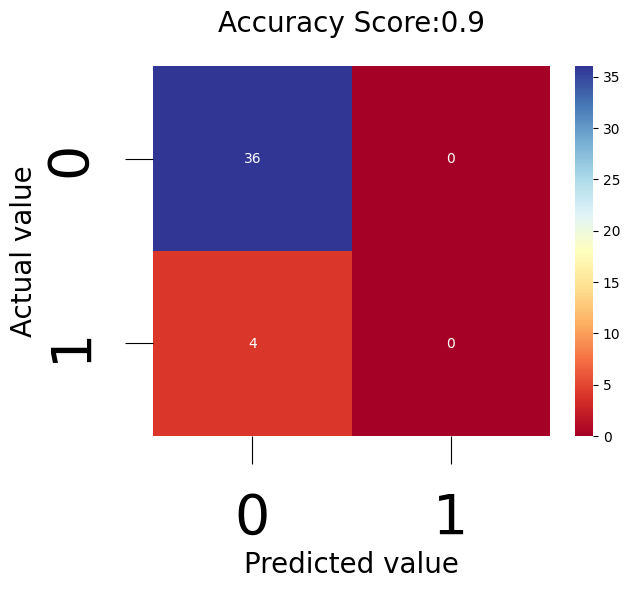

In [ ]:
sns.heatmap(ConfusionMatrix,xticklabels='auto',yticklabels='auto',annot=True,cmap='RdYlBu')
plt.ylabel("Actual value",fontsize=20)
plt.xlabel("Predicted value",fontsize=20)
plt.title("Accuracy Score:{0}".format(KNNAccuracy1),fontsize=20,pad=25)
plt.tick_params(axis='both',labelsize=40,pad=20,length=20)


K Nearest Neighbor Implementation for 7 neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNNClassifier2=KNeighborsClassifier(n_neighbors=7)
KNNClassifier2.fit(X_train,Y_train.values.ravel())
Y_pred=KNNClassifier2.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
KNNAccuracy2=KNNClassifier2.score(X_test,Y_test)
KNNAccuracy2

0.9

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
ConfusionMatrix=metrics.confusion_matrix(Y_test,Y_pred)
ConfusionMatrix

array([[36,  0],
       [ 4,  0]])

In [ ]:
KNNPrecision2=ConfusionMatrix[0][0]/(ConfusionMatrix[0][0]+ConfusionMatrix[1][0])
KNNPrecision2

0.9

In [ ]:
KNNRecall2=ConfusionMatrix[0][0]/(ConfusionMatrix[0][0]+ConfusionMatrix[0][1])
KNNRecall2

1.0

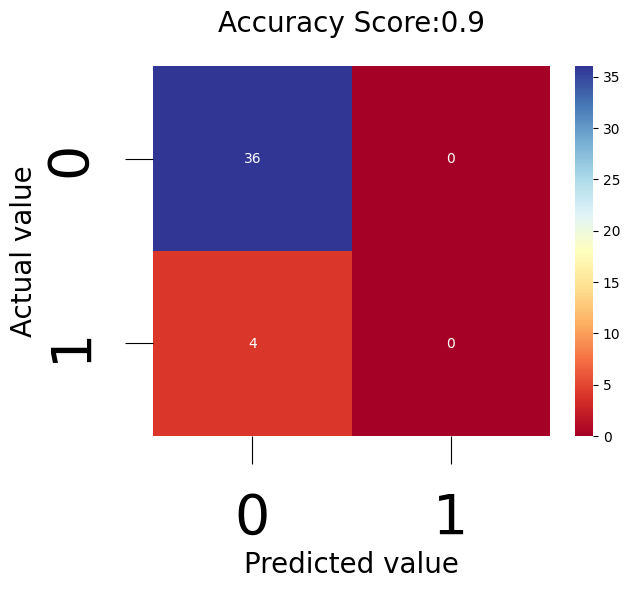

In [ ]:
sns.heatmap(ConfusionMatrix,xticklabels='auto',yticklabels='auto',annot=True,cmap='RdYlBu')
plt.ylabel("Actual value",fontsize=20)
plt.xlabel("Predicted value",fontsize=20)
plt.title("Accuracy Score:{0}".format(KNNAccuracy2),fontsize=20,pad=25)
plt.tick_params(axis='both',labelsize=40,pad=20,length=20)

K Nearest Neighbor Implementation for 9 neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNNClassifier3=KNeighborsClassifier(n_neighbors=9)
KNNClassifier3.fit(X_train,Y_train.values.ravel())
Y_pred=KNNClassifier3.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
KNNAccuracy3=KNNClassifier3.score(X_test,Y_test)
KNNAccuracy3

0.9

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
ConfusionMatrix=metrics.confusion_matrix(Y_test,Y_pred)
ConfusionMatrix

array([[36,  0],
       [ 4,  0]])

In [ ]:
KNNPrecision3=ConfusionMatrix[0][0]/(ConfusionMatrix[0][0]+ConfusionMatrix[1][0])
KNNPrecision3

0.9

In [ ]:
KNNRecall3=ConfusionMatrix[0][0]/(ConfusionMatrix[0][0]+ConfusionMatrix[0][1])
KNNRecall3

1.0

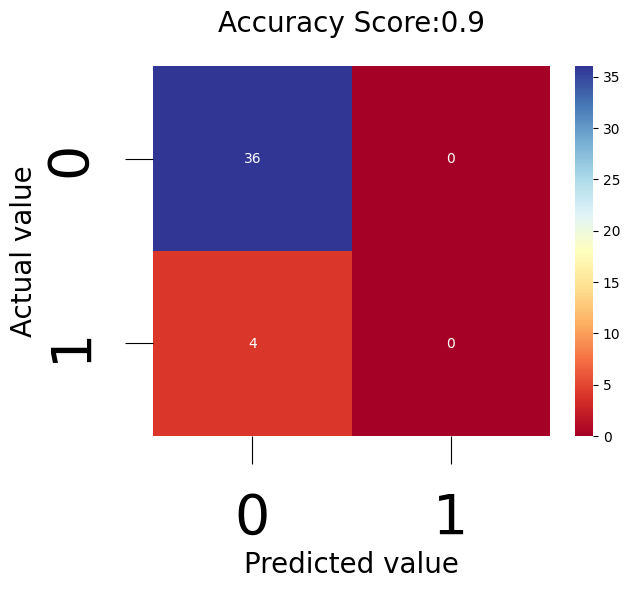

In [ ]:
sns.heatmap(ConfusionMatrix,xticklabels='auto',yticklabels='auto',annot=True,cmap='RdYlBu')
plt.ylabel("Actual value",fontsize=20)
plt.xlabel("Predicted value",fontsize=20)
plt.title("Accuracy Score:{0}".format(KNNAccuracy3),fontsize=20,pad=25)
plt.tick_params(axis='both',labelsize=40,pad=20,length=20)

K Nearest Neighbors Implementation for 11 Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNNClassifier4=KNeighborsClassifier(n_neighbors=11)
KNNClassifier4.fit(X_train,Y_train.values.ravel())
Y_pred=KNNClassifier4.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
KNNAccuracy4=KNNClassifier4.score(X_test,Y_test)
KNNAccuracy4

0.9

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
ConfusionMatrix=metrics.confusion_matrix(Y_test,Y_pred)
ConfusionMatrix

array([[36,  0],
       [ 4,  0]])

In [ ]:
KNNPrecision4=ConfusionMatrix[0][0]/(ConfusionMatrix[0][0]+ConfusionMatrix[1][0])
KNNPrecision4

0.9

In [ ]:
KNNRecall4=ConfusionMatrix[0][0]/(ConfusionMatrix[0][0]+ConfusionMatrix[0][1])
KNNRecall4

1.0

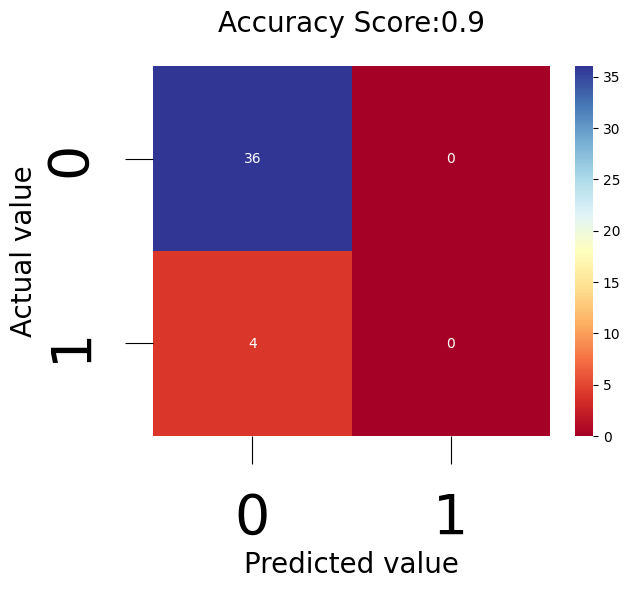

In [ ]:
sns.heatmap(ConfusionMatrix,xticklabels='auto',yticklabels='auto',annot=True,cmap='RdYlBu')
plt.ylabel("Actual value",fontsize=20)
plt.xlabel("Predicted value",fontsize=20)
plt.title("Accuracy Score:{0}".format(KNNAccuracy4),fontsize=20,pad=25)
plt.tick_params(axis='both',labelsize=40,pad=20,length=20)

K Nearest Neighbor Implementation for 12 Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNNClassifier5=KNeighborsClassifier(n_neighbors=12)
KNNClassifier5.fit(X_train,Y_train.values.ravel())
Y_pred=KNNClassifier5.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
KNNAccuracy5=KNNClassifier5.score(X_test,Y_test)
KNNAccuracy5

0.9

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
Confusion_Matrix=metrics.confusion_matrix(Y_test,Y_pred)
Confusion_Matrix

array([[36,  0],
       [ 4,  0]])

In [ ]:
KNNPrecision5=Confusion_Matrix[0][0]/(Confusion_Matrix[0][0]+Confusion_Matrix[1][0])
KNNPrecision5

0.9

In [ ]:
KNNRecall5=Confusion_Matrix[0][0]/(Confusion_Matrix[0][0]+Confusion_Matrix[0][1])
KNNRecall5

1.0

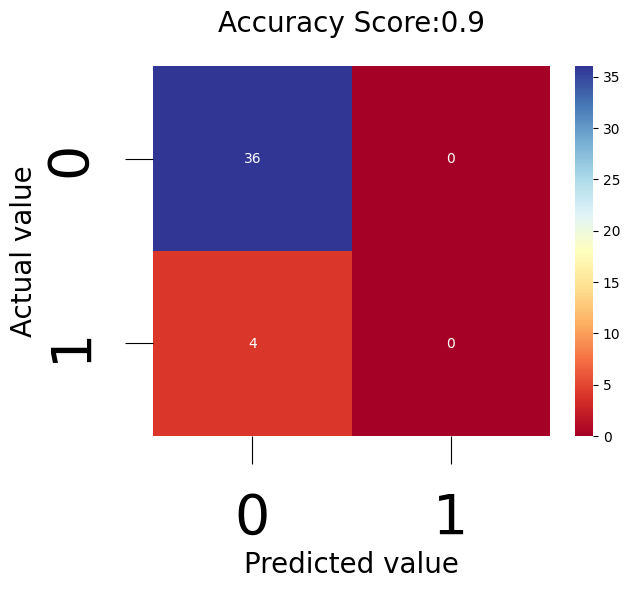

In [ ]:
sns.heatmap(Confusion_Matrix,xticklabels='auto',yticklabels='auto',annot=True,cmap='RdYlBu')
plt.ylabel("Actual value",fontsize=20)
plt.xlabel("Predicted value",fontsize=20)
plt.title("Accuracy Score:{0}".format(KNNAccuracy5),fontsize=20,pad=25)
plt.tick_params(axis='both',labelsize=40,pad=20,length=20)



K Nearest Neighbor Implementation for 13 neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNNClassifier6=KNeighborsClassifier(n_neighbors=13)
KNNClassifier6.fit(X_train,Y_train.values.ravel())
Y_pred=KNNClassifier6.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
KNNAccuracy6=KNNClassifier6.score(X_test,Y_test)
KNNAccuracy6

0.9

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
Confusionmatrix=metrics.confusion_matrix(Y_test,Y_pred)
Confusionmatrix

array([[36,  0],
       [ 4,  0]])

In [ ]:
KNNPrecision6=Confusionmatrix[0][0]/(Confusionmatrix[0][0]+Confusionmatrix[1][0])
KNNPrecision6

0.9

In [ ]:
KNNRecall6=Confusionmatrix[0][0]/(Confusionmatrix[0][0]+Confusionmatrix[0][1])
KNNRecall6

1.0

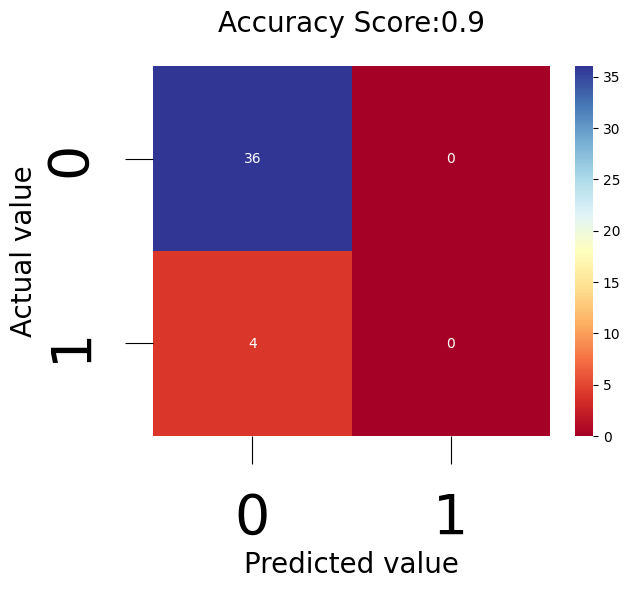

In [ ]:
sns.heatmap(Confusionmatrix,xticklabels='auto',yticklabels='auto',annot=True,cmap='RdYlBu')
plt.ylabel("Actual value",fontsize=20)
plt.xlabel("Predicted value",fontsize=20)
plt.title("Accuracy Score:{0}".format(KNNAccuracy6),fontsize=20,pad=25)
plt.tick_params(axis='both',labelsize=40,pad=20,length=20)

K Nearest Neighbor Implementation for 14 Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNNClassifier7=KNeighborsClassifier(n_neighbors=14)
KNNClassifier7.fit(X_train,Y_train.values.ravel())
Y_pred=KNNClassifier7.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
KNNAccuracy7=KNNClassifier7.score(X_test,Y_test)
KNNAccuracy7

0.9

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
Confusionmatrix=metrics.confusion_matrix(Y_test,Y_pred)
Confusionmatrix

array([[36,  0],
       [ 4,  0]])

In [ ]:
KNNPrecision7=Confusionmatrix[0][0]/(Confusionmatrix[0][0]+Confusionmatrix[1][0])
KNNPrecision7

0.9

In [ ]:
KNNRecall7=Confusionmatrix[0][0]/(Confusionmatrix[0][0]+Confusionmatrix[0][1])
KNNRecall7

1.0

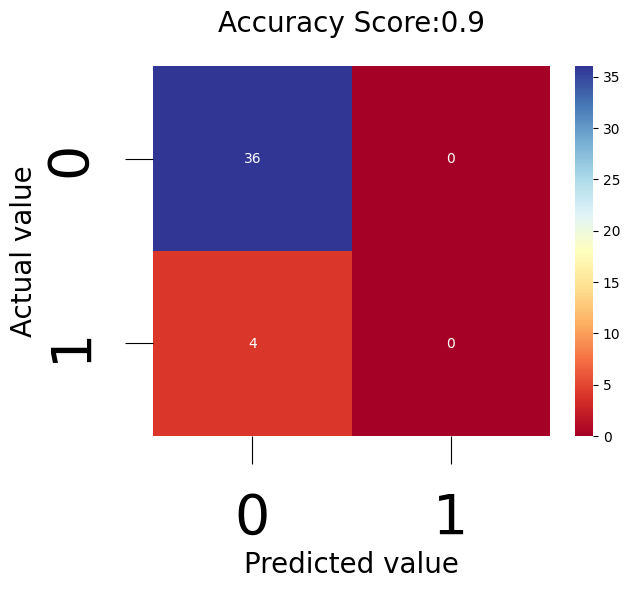

In [ ]:
sns.heatmap(Confusionmatrix,xticklabels='auto',yticklabels='auto',annot=True,cmap='RdYlBu')
plt.ylabel("Actual value",fontsize=20)
plt.xlabel("Predicted value",fontsize=20)
plt.title("Accuracy Score:{0}".format(KNNAccuracy7),fontsize=20,pad=25)
plt.tick_params(axis='both',labelsize=40,pad=20,length=20)

K Nearest Neighbor for 15 Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNNClassifier8=KNeighborsClassifier(n_neighbors=15)
KNNClassifier8.fit(X_train,Y_train.values.ravel())
Y_pred=KNNClassifier8.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
KNNAccuracy8=KNNClassifier8.score(X_test,Y_test)
KNNAccuracy8

0.9

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
Confusionmatrix=metrics.confusion_matrix(Y_test,Y_pred)
Confusionmatrix

array([[36,  0],
       [ 4,  0]])

In [ ]:
KNNPrecision8=Confusionmatrix[0][0]/(Confusionmatrix[0][0]+Confusionmatrix[1][0])
KNNPrecision8

0.9

In [ ]:
KNNRecall8=Confusionmatrix[0][0]/(Confusionmatrix[0][0]+Confusionmatrix[0][1])
KNNRecall8

1.0

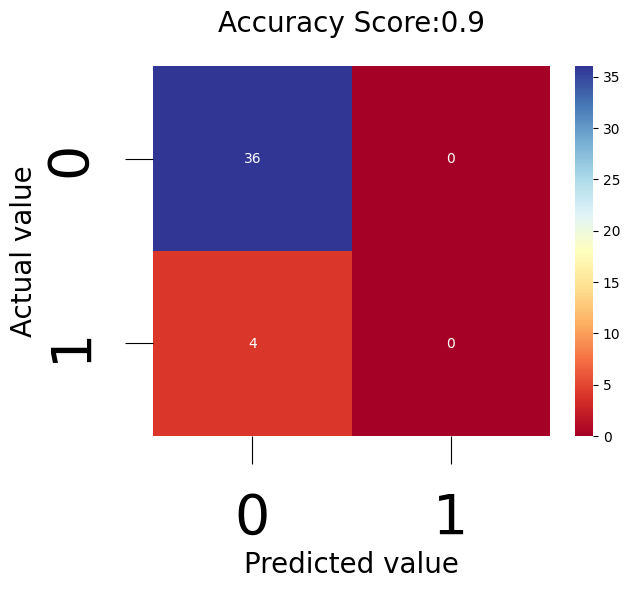

In [ ]:
sns.heatmap(Confusionmatrix,xticklabels='auto',yticklabels='auto',annot=True,cmap='RdYlBu')
plt.ylabel("Actual value",fontsize=20)
plt.xlabel("Predicted value",fontsize=20)
plt.title("Accuracy Score:{0}".format(KNNAccuracy8),fontsize=20,pad=25)
plt.tick_params(axis='both',labelsize=40,pad=20,length=20)

In [ ]:
KNNAccuracyArray=[KNNAccuracy1,KNNAccuracy2,KNNAccuracy3,KNNAccuracy4,KNNAccuracy5,KNNAccuracy6,KNNAccuracy7,KNNAccuracy8]
SFKNNAccuracy=max(KNNAccuracyArray)

K Fold Cross Validation for 12 Neighbors where K=5

In [ ]:
from sklearn.model_selection import train_test_split
import random
random.seed()
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.40,random_state=0)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

kf=KFold(n_splits=5)
KNNClassifier=KNeighborsClassifier(n_neighbors=12)
count=0
sum=0
for train_index,test_index in kf.split(x):


  KNNClassifier.fit(X_train,Y_train.values.ravel())
  accuracy=KNNClassifier.score(X_test,Y_test)
  sum=sum+accuracy
  count=count+1
print(sum/count)




0.9


K Fold Cross Validation for 12 Neighbors where K=10

In [ ]:
from sklearn.model_selection import train_test_split
import random
random.seed()
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.40,random_state=0)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

kf=KFold(n_splits=10)
KNNClassifier=KNeighborsClassifier(n_neighbors=12)
count=0
sum=0
for train_index,test_index in kf.split(x):


  KNNClassifier.fit(X_train,Y_train.values.ravel())
  accuracy=KNNClassifier.score(X_test,Y_test)
  sum=sum+accuracy
  count=count+1
print("Accuracy:",sum/count)




Accuracy: 0.9000000000000001


## **Case 2: 70:30 Train-Test Ratio**

In [ ]:
from sklearn.model_selection import train_test_split
import random
random.seed()
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
stdscaler=StandardScaler()
x_train=stdscaler.fit_transform(X_train)
x_test=stdscaler.transform(X_test)

K Nearest Neighbor Classifier Implementation for 5 neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNNClassifier=KNeighborsClassifier()
KNNClassifier.fit(X_train,Y_train.values.ravel())
Y_pred=KNNClassifier.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
KNNAccuracy1=KNNClassifier.score(X_test,Y_test)
KNNAccuracy1

0.9

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
Confusion_Matrix=metrics.confusion_matrix(Y_test,Y_pred)
Confusion_Matrix

array([[27,  0],
       [ 3,  0]])

In [ ]:
KNNPrecision1=Confusion_Matrix[0][0]/(Confusion_Matrix[0][0]+Confusion_Matrix[1][0])
KNNPrecision1

0.9

In [ ]:
KNNRecall1=Confusion_Matrix[0][0]/(Confusion_Matrix[0][0]+Confusion_Matrix[0][1])
KNNRecall1

1.0

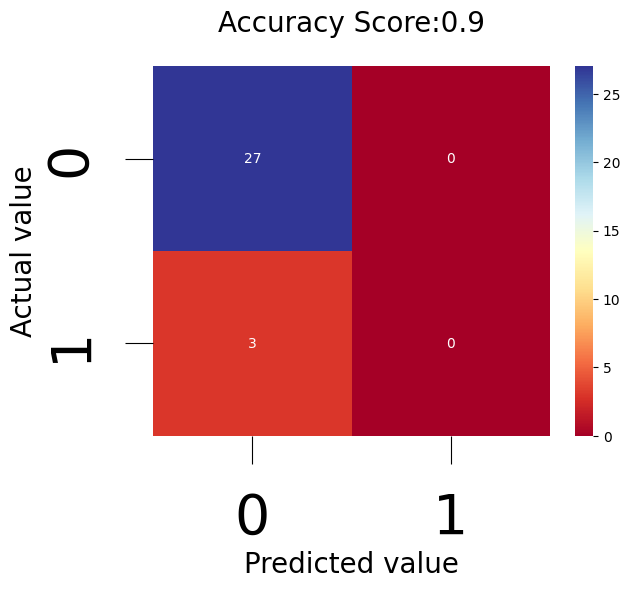

In [ ]:
sns.heatmap(Confusion_Matrix,xticklabels='auto',yticklabels='auto',annot=True,cmap='RdYlBu')
plt.ylabel("Actual value",fontsize=20)
plt.xlabel("Predicted value",fontsize=20)
plt.title("Accuracy Score:{0}".format(KNNAccuracy1),fontsize=20,pad=25)
plt.tick_params(axis='both',labelsize=40,pad=20,length=20)

K Nearest Neighbor Implementation for 7 Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNNClassifier2=KNeighborsClassifier(n_neighbors=7)
KNNClassifier2.fit(X_train,Y_train.values.ravel())
Y_pred=KNNClassifier2.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
KNNAccuracy2=KNNClassifier2.score(X_test,Y_test)
KNNAccuracy2

0.9

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
Confusion_Matrix=metrics.confusion_matrix(Y_test,Y_pred)
Confusion_Matrix

array([[27,  0],
       [ 3,  0]])

In [ ]:
KNNPrecision2=Confusion_Matrix[0][0]/(Confusion_Matrix[0][0]+Confusion_Matrix[1][0])
KNNPrecision2

0.9

In [ ]:
KNNRecall2=Confusion_Matrix[0][0]/(Confusion_Matrix[0][0]+Confusion_Matrix[0][1])
KNNRecall2

1.0

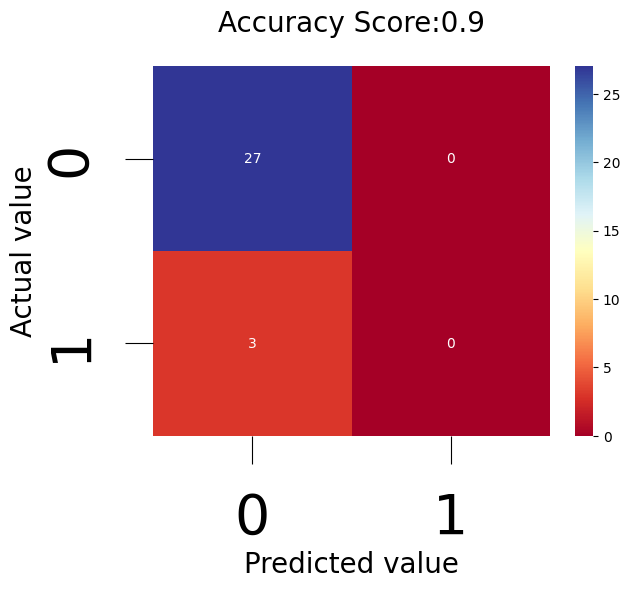

In [ ]:
sns.heatmap(Confusion_Matrix,xticklabels='auto',yticklabels='auto',annot=True,cmap='RdYlBu')
plt.ylabel("Actual value",fontsize=20)
plt.xlabel("Predicted value",fontsize=20)
plt.title("Accuracy Score:{0}".format(KNNAccuracy2),fontsize=20,pad=25)
plt.tick_params(axis='both',labelsize=40,pad=20,length=20)

K Nearest Neighbor Implementation for 9 Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNNClassifier3=KNeighborsClassifier(n_neighbors=9)
KNNClassifier3.fit(X_train,Y_train.values.ravel())
Y_pred=KNNClassifier.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
KNNAccuracy3=KNNClassifier3.score(X_test,Y_test)
KNNAccuracy3

0.9

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
Confusion_Matrix=metrics.confusion_matrix(Y_test,Y_pred)
Confusion_Matrix

array([[27,  0],
       [ 3,  0]])

In [ ]:
KNNPrecision3=Confusion_Matrix[0][0]/(Confusion_Matrix[0][0]+Confusion_Matrix[1][0])
KNNPrecision3

0.9

In [ ]:
KNNRecall3=Confusion_Matrix[0][0]/(Confusion_Matrix[0][0]+Confusion_Matrix[0][1])
KNNRecall3

1.0

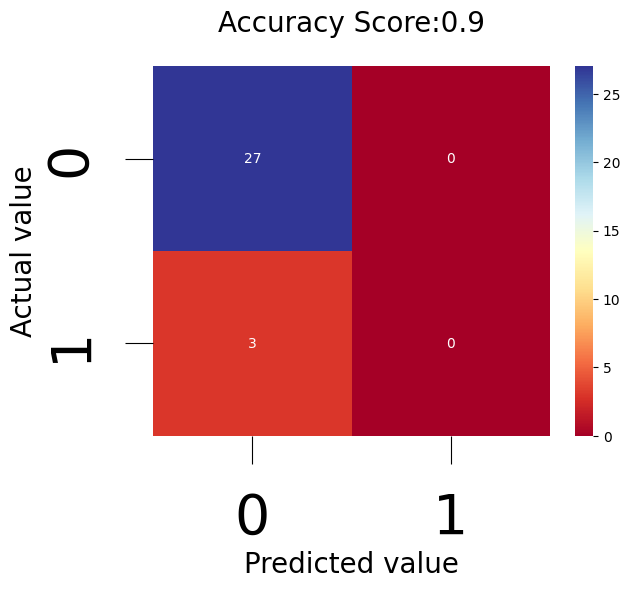

In [ ]:
sns.heatmap(Confusion_Matrix,xticklabels='auto',yticklabels='auto',annot=True,cmap='RdYlBu')
plt.ylabel("Actual value",fontsize=20)
plt.xlabel("Predicted value",fontsize=20)
plt.title("Accuracy Score:{0}".format(KNNAccuracy2),fontsize=20,pad=25)
plt.tick_params(axis='both',labelsize=40,pad=20,length=20)

In [ ]:
KNNAccuracyArray2=[KNNAccuracy1,KNNAccuracy2,KNNAccuracy3,KNNAccuracy4,KNNAccuracy5,KNNAccuracy6,KNNAccuracy7,KNNAccuracy8]
STKNNAccuracy=max(KNNAccuracyArray)
STKNNAccuracy

0.9

K Fold Cross Validation for n=5

In [ ]:
from sklearn.model_selection import train_test_split
import random
random.seed()
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30,random_state=0)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

kf=KFold(n_splits=5)
KNNClassifier=KNeighborsClassifier(n_neighbors=9)
count=0
sum=0
for train_index,test_index in kf.split(x):


  KNNClassifier.fit(X_train,Y_train.values.ravel())
  accuracy=KNNClassifier.score(X_test,Y_test)
  sum=sum+accuracy
  count=count+1
print(sum/count)



0.9


K Fold Cross Validation for k=10

In [ ]:
from sklearn.model_selection import train_test_split
import random
random.seed()
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30,random_state=0)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

kf=KFold(n_splits=10)
KNNClassifier=KNeighborsClassifier(n_neighbors=9)
count=0
sum=0
for train_index,test_index in kf.split(x):


  KNNClassifier.fit(X_train,Y_train.values.ravel())
  accuracy=KNNClassifier.score(X_test,Y_test)
  sum=sum+accuracy
  count=count+1
print(sum/count)



0.9000000000000001


## **Case 3:80:20 Train-Test Ratio**

In [ ]:
from sklearn.model_selection import train_test_split
import random
random.seed()
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
stdscaler=StandardScaler()
x_train=stdscaler.fit_transform(X_train)
x_test=stdscaler.transform(X_test)

K Nearest Neighbour classifier for 5 neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNNClassifier=KNeighborsClassifier()
KNNClassifier.fit(X_train,Y_train.values.ravel())
Y_pred=KNNClassifier.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
KNNAccuracy1=KNNClassifier.score(X_test,Y_test)
KNNAccuracy1

0.9

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
Confusion_Matrix=metrics.confusion_matrix(Y_test,Y_pred)
Confusion_Matrix

array([[18,  0],
       [ 2,  0]])

In [ ]:
KNNPrecision1=Confusion_Matrix[0][0]/(Confusion_Matrix[0][0]+Confusion_Matrix[1][0])
KNNPrecision1

0.9

In [ ]:
KNNRecall1=Confusionmatrix[0][0]/(Confusionmatrix[0][0]+Confusionmatrix[0][1])
KNNRecall1

1.0

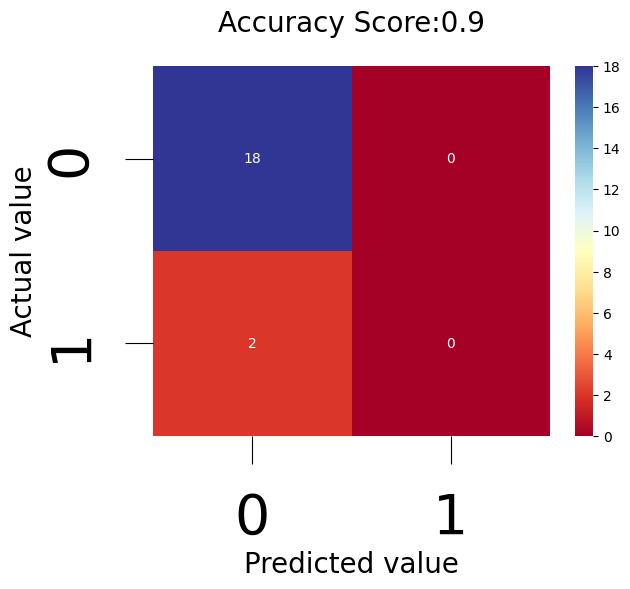

In [ ]:
sns.heatmap(Confusion_Matrix,xticklabels='auto',yticklabels='auto',annot=True,cmap='RdYlBu')
plt.ylabel("Actual value",fontsize=20)
plt.xlabel("Predicted value",fontsize=20)
plt.title("Accuracy Score:{0}".format(KNNAccuracy1),fontsize=20,pad=25)
plt.tick_params(axis='both',labelsize=40,pad=20,length=20)

KNN For 7 neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNNClassifier=KNeighborsClassifier(n_neighbors=7)
KNNClassifier.fit(X_train,Y_train.values.ravel())
Y_pred=KNNClassifier.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
KNNAccuracy2=KNNClassifier.score(X_test,Y_test)
KNNAccuracy2

0.9

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
Confusion_Matrix=metrics.confusion_matrix(Y_test,Y_pred)
Confusion_Matrix

array([[18,  0],
       [ 2,  0]])

In [ ]:
KNNPrecision2=Confusion_Matrix[0][0]/(Confusion_Matrix[0][0]+Confusion_Matrix[1][0])
KNNPrecision2

0.9

In [ ]:
KNNRecall2=Confusionmatrix[0][0]/(Confusionmatrix[0][0]+Confusionmatrix[0][1])
KNNRecall2

1.0

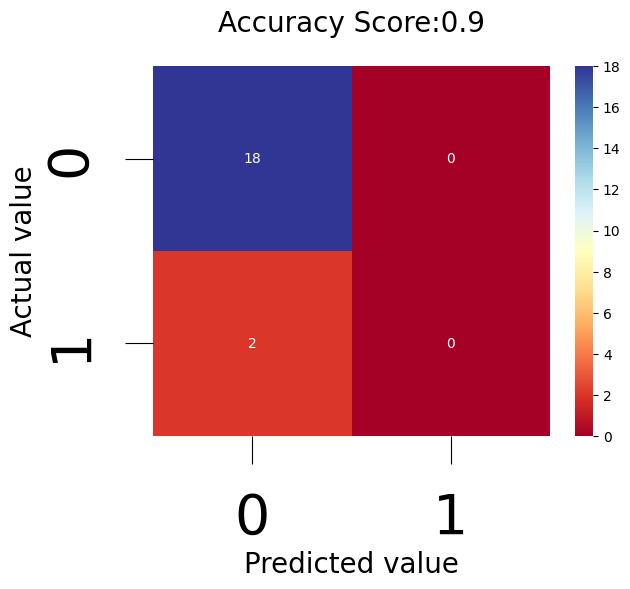

In [ ]:
sns.heatmap(Confusion_Matrix,xticklabels='auto',yticklabels='auto',annot=True,cmap='RdYlBu')
plt.ylabel("Actual value",fontsize=20)
plt.xlabel("Predicted value",fontsize=20)
plt.title("Accuracy Score:{0}".format(KNNAccuracy2),fontsize=20,pad=25)
plt.tick_params(axis='both',labelsize=40,pad=20,length=20)

K Nearest Neighbor for n=9

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNNClassifier=KNeighborsClassifier(n_neighbors=9)
KNNClassifier.fit(X_train,Y_train.values.ravel())
Y_pred=KNNClassifier.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
KNNAccuracy3=KNNClassifier.score(X_test,Y_test)
KNNAccuracy3

0.9

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
Confusion_Matrix=metrics.confusion_matrix(Y_test,Y_pred)
Confusion_Matrix

array([[18,  0],
       [ 2,  0]])

In [ ]:
KNNPrecision3=Confusion_Matrix[0][0]/(Confusion_Matrix[0][0]+Confusion_Matrix[1][0])
KNNPrecision3

0.9

In [ ]:
KNNRecall3=Confusionmatrix[0][0]/(Confusionmatrix[0][0]+Confusionmatrix[0][1])
KNNRecall3

1.0

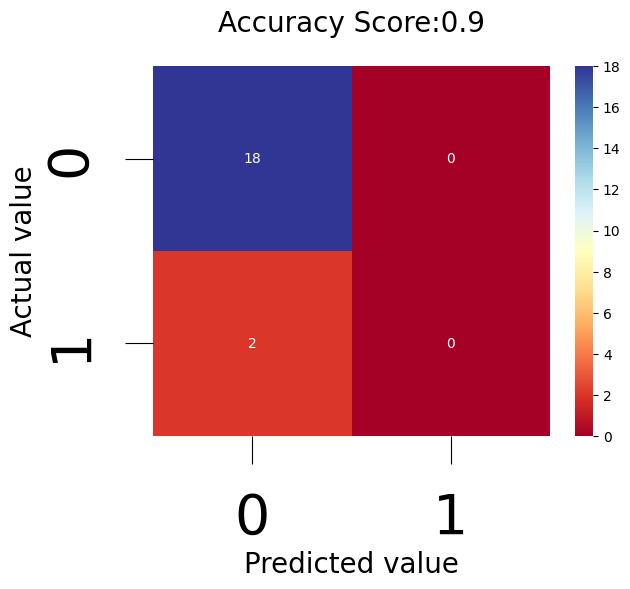

In [ ]:
sns.heatmap(Confusion_Matrix,xticklabels='auto',yticklabels='auto',annot=True,cmap='RdYlBu')
plt.ylabel("Actual value",fontsize=20)
plt.xlabel("Predicted value",fontsize=20)
plt.title("Accuracy Score:{0}".format(KNNAccuracy3),fontsize=20,pad=25)
plt.tick_params(axis='both',labelsize=40,pad=20,length=20)

Final Table

In [ ]:
Names=['LOGISTIC REGRESSION','SVM','NAIVE BAYES','K NEAREST NEIGHBOUR']

In [ ]:
df=pd.DataFrame()

In [ ]:
df['NAME']=Names

In [ ]:
df

,NAME
0,LOGISTIC REGRESSION
1,SVM
2,NAIVE BAYES
3,K NEAREST NEIGHBOUR


In [ ]:
df['60:40']=pd.Series([col1[0],col1[1],col1[2],0.9])
df['70:30']=pd.Series([col2[0],col2[1],col2[2],0.9])
df['80:20']=pd.Series([col3[0],col3[1],col3[2],0.9])

In [ ]:
df

,NAME,60:40,70:30,80:20
0,LOGISTIC REGRESSION,0.900,0.900000,0.90
1,SVM,0.900,0.900000,0.90
2,NAIVE BAYES,0.825,0.766667,0.75
3,K NEAREST NEIGHBOUR,0.900,0.900000,0.90


# **BALLS VS RUNS**

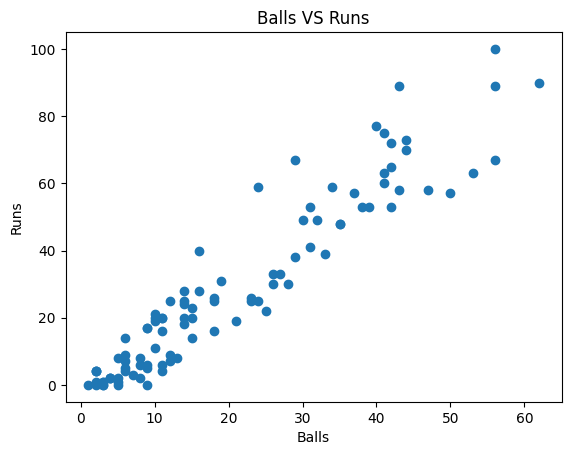

In [ ]:
x=DWdata3['BF']
y=DWdata3['Runs']
plt.xlabel('Balls')
plt.ylabel('Runs')
plt.title('Balls VS Runs')
plt.scatter(x,y)
plt.show()

In [ ]:
df=pd.DataFrame()

In [ ]:
Names=['LOGISTIC REGRESSION','SVM','NAIVE BAYES','K NEAREST NEIGHBOUR']
df['NAME']=Names

In [ ]:
df

,NAME
0,LOGISTIC REGRESSION
1,SVM
2,NAIVE BAYES
3,K NEAREST NEIGHBOUR


In [ ]:
df['80:20']=pd.Series([col3[0],col3[1],col3[2],0.9])

In [ ]:
df

,NAME,80:20
0,LOGISTIC REGRESSION,0.90
1,SVM,0.90
2,NAIVE BAYES,0.75
3,K NEAREST NEIGHBOUR,0.90


In [ ]:
import plotly.express as px

LABELS=['LOGISTIC REGRESSION','SVM','NAIVE BAYES','K NEAREST NEIGHBOUR','K FOLD CROSS VALIDATION']

values=[col3[0],col3[1],col3[2],0.9,0.9]

fig=px.pie(values=values,names=LABELS)
fig.show()

This is the end of the David Warner part of the analysis